# **Tottenham in the English Premier League**
This project will analyse the player, match and team statistics for all English Premier League games during the 2019-2020 season. To narrow down the scope of the project, the focus will be on assessing the performance of Tottenham Hotspur F.C. during the 2019-20 season, as well as their players. 

It will also explore match data beginning from the 1993-1994 season up until the 2020-2021 season for historical comparisons and a bit of background context.

 *Summary of contents:*
1. Introduction
2. Summary
3. Data Inspection and Cleaning
4. Analysis and Visualizations   
5. Conclusions and Discussions
6. Future Analysis
7. References


### **1. Introduction**
With the English Premier League 2021-22 season beginning on Saturday the 14th of August, there is reason for excitement. Heavyweights Manchester City are favourites to win the title, spending $100 million pounds on Jack Grealish (Smale, 2021) to bolster their attacking unit. Chelsea are coming into the season revitalised as the newly crowned Champions League and Super Cup winners, and Brentford FC is making an appearance for the first time in the league from the EFL Championship.
As of today, the 2020-21 Premier League squads (Premier League, 2021) are all confirmed and play is ready to resume. Before we make our predictions, it is important that we reflect on previous history to help inform us.

The analysis completed as part of this project will help visualise the key drivers of Tottenham's performance in the 2019-20 English Premier League season, identify problems, and demonstrate the changes that will need to be made to the club heading forward.

As a loyal Tottenham supporter, it is out of my own personal interest that I chose to use these datasets. I decided upon the following research questions because I believe that regardless of whether you follow the English Premier League, extensive football knowledge is not required to understand the intricacies of the game. Ultimately, I hope the answers from these research questions will provide insights into the most-watched sports league in the world and a greater understanding about the Tottenham club itself, for fans and newbies alike.

**Research Questions**

The following questions will be answered:

* What proportion of players at Tottenham were of English background during the 2019-20 season? 
* Which Tottenham player produced the most amount of goals in the form of goals scored and assisted in the 2019-20 season? Who else performed notably well? 
* How does Tottenham perform when they're away as opposed to when they are playing from home? Is it a high percentage or not?
* How does the scoring and creativity of Tottenham players compare to other top-tier players in the English Premier League?
* How does Tottenham's goalkeeping performance compare to other teams in the English Premier League for the 2019-20 season?
* Which season saw the most comebacks from Tottenham?
* Which team has taken advantage of their home matches and defended their fortress the most in the 2019-20 season? How has Tottenham performed against them?

**Data Files**

This notebook uses four data files. The primary key that was used to link all the files was the team, player name, and match date. A brief description of each of the data files has been included below:

**seasons_93to21.csv**

File obtained from [Kaggle](https://www.kaggle.com/irkaal/english-premier-league-results) (Alvin, 2021). The file contains Premier League Results from season 1993-94 to 2020-21. The main data columns include:

* Season - year of the premier league season
* DateTime - match date and time
* HomeTeam - name of home team
* AwayTeam - name of away team
* FTHG - full time home team goals
* FTAG - full time away team goals
* HTHG - half time home team goals
* HTAG - half time away team goals

**players_19_20.csv**

File obtained from [Kaggle](https://www.kaggle.com/idoyo92/epl-stats-20192020) (Yoely, 2020). Player's performance in each of their matches in the 2019-20 season as collected and recorded by the official Fantasy Premier League game. The main data columns include:

* Full - player name
* Assists - assists in game
* Fixture - game ID
* Kickoff_time - match time
* Minutes - minutes played
* Team - team of player
* Goals_scored - number of goals scored in game by player
* Saves - total number of saves in game
* Opponent - team played against

**match_infos_EPL_1920.csv**

File obtained from [Kaggle](https://www.kaggle.com/scientistdat/epl-2019-20-opta-analysis/data?select=match_infos_EPL_1920.csv#data) (Pawar, 2020). The Kaggle author extracted data containing a summary overview of each match in the Premier League 2019-20 season. The main data columns include:

* team_h - name of football club
* team_a - opposition team name
* h_xg - expected goals
* a_xg - expected goals for opponent
* date - match date and time
* h_goals - goals scored by home team 
* a_goals - goals scored by away team
* h_w - probability home team wins match
* h_d - probability home team draws
* h_l - probability home team loses match

**epl_players_stats.csv**

File obtained from [Kaggle](https://www.kaggle.com/cashncarry/epl-players-deep-stats-20192020) (Alex, 2020). This file contains the aggregated statistics of all players that played in the English Premier League 2019-20 season. The main data columns include:

* Name - name of player
* Team - club of player
* Nationality - nationality of player
* Position - player's position
* Minutes - total number of minutes the player played overall
* Goals - total number of goals scored
* Assists - total number of assists scored
* Successful_passes_pt - percentage of passes completed by the player successfully
* key_passes_m - average key passes made by the player per match
* dribbles_won_m - average successful dribbles made by the player per match
* tackles_m - average successful tackles made by the player per match
* interceptions_m - average successful dribbles made by the player per match
* gk_saves_m - average successful saves made by the player per match




### **2. Summary**

Overall, Tottenham had a mediocre 2019-20 season for a club aiming to consistently be in the top 4. Tottenham's most important players were Son Heung-min and Harry Kane, and their over reliance on them to score goals and produce them has led the team lacking in other areas, notably in defence. As such, the services of Hugo Lloris have had to be called upon a bit too often in order to keep Tottenham in the game. 

The club has defended their home turf well which may be down to the new stadium. However, they need to find a way to win when playing away as they are losing far too many points. Players and club need to tap into a grit and grind mindset, with the team beginning to pull consistent comebacks each season and they will need more of these in future.

Whilst, the Spurs superstars Son and Kane have performed well, there is still room for improvement relative to other top-tier players. To remain competitive, individually the attacking players will need to produce at a level similar to Manchester City's and Liverpool's to be serious title contenders.


### **3. Data Inspection and Cleaning**

In [216]:
# Import the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.patheffects as pe
from numpy import where
from datetime import datetime as dt
import geopandas
import geoplot

%matplotlib inline

In [217]:
# Import the data files and name them appropriately
seasons_df = pd.read_csv("seasons_93to21.csv", encoding='latin1') # Changed encoding type for special characters in file
playersmatches_df = pd.read_csv("players_19_20.csv", index_col = 0)
teams_df = pd.read_csv("match_infos_EPL_1920.csv", index_col = 0)
opponents_df = pd.read_csv("match_infos_EPL_1920.csv", index_col = 0) # Same data file imported twice - will be explained later
players_df = pd.read_csv("epl_players_stats.csv", index_col = 0)


# Inspect the seasons dataframe
print(seasons_df.columns.is_unique)
print(seasons_df.shape)
print(seasons_df[seasons_df.duplicated() == True])
seasons_df.head()

True
(10804, 23)
Empty DataFrame
Columns: [Season, DateTime, HomeTeam, AwayTeam, FTHG, FTAG, FTR, HTHG, HTAG, HTR, Referee, HS, AS, HST, AST, HC, AC, HF, AF, HY, AY, HR, AR]
Index: []

[0 rows x 23 columns]


,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A brief inpsection shows the seasons data frame is good, up until the HTHG (half time home team goals) column. There appears to be missing values, indicating that there is some cleaning required to make the data more usable. On the positive side, all the columns are unique, there are no duplicated rows, and the data frame is a decent size to work with.

**List of corrections**

* For the data files which had match date and time present, the date portion was stripped and the kickoff time was excluded.
* Inconsistent spelling of club names was used in different data files and these were corrected so that the data frames could be merged using the team name as an index.
* Missing values were replaced with 0 where appropriate and columns/rows which were not necessary for analyses were removed.
* File 3 which contained the results of each match, separated data depending on whether it was a home team or away team. When matching on team name with the player data from File 2, it did so only on the home team. A second data frame needed to be created from file 3 which was able to matched with the away team to obtain a full data set.  

**File 1 - Premier League Results from Seasons 1993-94 to 2020-21**




In [218]:
# Remove columns that are not required
seasons_df.drop(seasons_df.iloc[:, 10:], inplace = True, axis = 1)

# Rename the remaining columns
seasons_df = seasons_df.rename(
    columns = {
        'DateTime': 'Match Date and Time', 'HomeTeam': 'Home Team', 'AwayTeam': 'Away Team',
        'FTHG': 'Full Time Home Team Goals', 'FTAG': 'Full Time Away Team Goals', 'FTR': 'Full Time Result',
        'HTHG': 'Half Time Home Team Goals', 'HTAG': 'Half Time Away Team Goals', 'HTR': 'Half Time Result'
    }
)

# Replace missing values with 0
seasons_df.fillna(value = 0, inplace = True)

# Convert half time goals into integers
seasons_df['Half Time Home Team Goals'] = seasons_df['Half Time Home Team Goals'].astype(int)
seasons_df['Half Time Away Team Goals'] = seasons_df['Half Time Away Team Goals'].astype(int)

# Print overview of cleaned seasons data frame
print(seasons_df.describe())
seasons_df.info()


       Full Time Home Team Goals  Full Time Away Team Goals  \
count               10804.000000               10804.000000   
mean                    1.519160                   1.136801   
std                     1.301138                   1.132514   
min                     0.000000                   0.000000   
25%                     1.000000                   0.000000   
50%                     1.000000                   1.000000   
75%                     2.000000                   2.000000   
max                     9.000000                   9.000000   

       Half Time Home Team Goals  Half Time Away Team Goals  
count               10804.000000               10804.000000  
mean                    0.626435                   0.455942  
std                     0.822387                   0.701622  
min                     0.000000                   0.000000  
25%                     0.000000                   0.000000  
50%                     0.000000                   0.000000 

Now that the data is all cleaned up, a quick statistical summary suggests that there is an advantage when playing at home. On average, the home team scores more goals than the away team.

As identified previously, there were missing values in the earlier seasons for the columns holding half time data. By season 2000-01, there are no longer any null values. For the time being, these null entries have been replaced with zero. However, in analyses down the track where half time data is needed, rows with missing half time data will be removed (see Question 6).


In [219]:
# Show first five rows of seasons data frame
seasons_df.head()

,Season,Match Date and Time,Home Team,Away Team,Full Time Home Team Goals,Full Time Away Team Goals,Full Time Result,Half Time Home Team Goals,Half Time Away Team Goals,Half Time Result
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,0,0,0
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,0,0,0
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,0,0,0
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,0,0,0
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,0,0,0


**File 2 - Player Performance in the English Premier League 2019-20 Season**


In [220]:
# Inspect the data frame
print(playersmatches_df.columns.is_unique)
print(playersmatches_df.shape)
print(playersmatches_df[playersmatches_df.duplicated() == True])
print(playersmatches_df.describe())
playersmatches_df.info()

True
(22502, 34)
Empty DataFrame
Columns: [assists, bonus, bps, clean_sheets, creativity, element, fixture, goals_conceded, goals_scored, ict_index, influence, kickoff_time, minutes, opponent_team, own_goals, penalties_missed, penalties_saved, red_cards, round, saves, selected, team_a_score, team_h_score, threat, total_points, transfers_balance, transfers_in, transfers_out, value, was_home, yellow_cards, full, team, ppm]
Index: []

[0 rows x 34 columns]
            assists         bonus           bps  clean_sheets    creativity  \
count  22502.000000  22502.000000  22502.000000  22502.000000  22502.000000   
mean       0.040041      0.107902      6.115012      0.104302      4.848378   
std        0.211752      0.490432      9.699022      0.305658     10.832486   
min        0.000000      0.000000    -12.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0

So far the data frame looks good with no duplicated rows or missing values. Since the data has been extracted from the Fantasy Premier League app, there are some columns that are not needed for the purposes of this analysis and they will be removed. The data frame is also quite large with 22,502 rows. This is because it records the statistics of every individual performance each player had in the 2019-20 season.

In [221]:
# Remove columns that aren't needed
playersmatches_df = playersmatches_df.drop(
    ['bonus', 'bps', 'goals_conceded', 'creativity', 'element', 'ict_index', 'influence', 'ppm'], # Labels of columns to drop
    axis = 1
)
playersmatches_df.drop(playersmatches_df.iloc[:, 7:12], inplace = True, axis = 1)
playersmatches_df.drop(playersmatches_df.iloc[:, 8:19], inplace = True, axis = 1)

# Renaming columns
playersmatches_df = playersmatches_df.rename(
    columns = {
        'assists': 'Assists', 'clean_sheets': 'Clean Sheets', 'fixture': 'Game ID', 
        'goals_scored': 'Goals Scored by Player', 'kickoff_time': 'Match Date',
        'minutes': 'Minutes Played', 'opponent_team': 'Opponent', 'saves': 'Saves', 'full': 'Player', 'team': 'Team'  
    }
)

# Rearrange columns
playersmatches_df = playersmatches_df[['Team', 'Player', 'Match Date', 'Game ID', 'Minutes Played', 'Goals Scored by Player', 'Assists', 'Saves', 'Clean Sheets', 'Opponent']]

# Convert match date into a datetime object and remove time from the values
playersmatches_df['Match Date'] = pd.to_datetime(playersmatches_df['Match Date'], format = '%Y-%m-%d')
playersmatches_df['Match Date'] = pd.to_datetime(playersmatches_df['Match Date']).dt.date

# Print overview of cleaned data frame
print(playersmatches_df.describe())
playersmatches_df.info()

            Game ID  Minutes Played  Goals Scored by Player       Assists  \
count  22502.000000    22502.000000            22502.000000  22502.000000   
mean     198.644920       33.292107                0.044485      0.040041   
std      109.681304       40.671211                0.230016      0.211752   
min        1.000000        0.000000                0.000000      0.000000   
25%      104.000000        0.000000                0.000000      0.000000   
50%      203.000000        0.000000                0.000000      0.000000   
75%      294.750000       90.000000                0.000000      0.000000   
max      380.000000       90.000000                4.000000      3.000000   

              Saves  Clean Sheets  
count  22502.000000  22502.000000  
mean       0.098791      0.104302  
std        0.640450      0.305658  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max       12.00000

Interestingly, the average game time in a match for a player in the 2019-20 season was 33 minutes. A view of the refreshed data frame is displayed below.

In [222]:
# Show first five rows of data frame
playersmatches_df.head()

,Team,Player,Match Date,Game ID,Minutes Played,Goals Scored by Player,Assists,Saves,Clean Sheets,Opponent
1,Brighton,Aaron Connolly,2019-08-31,37,24,0,0,0,0,Man City
2,Brighton,Aaron Connolly,2019-09-14,43,6,0,0,0,0,Burnley
3,Brighton,Aaron Connolly,2019-09-21,58,20,0,0,0,0,Newcastle United
4,Brighton,Aaron Connolly,2019-09-28,63,25,0,0,0,0,Chelsea
5,Brighton,Aaron Connolly,2019-10-05,72,79,2,0,0,1,Tottenham


**File 3 - Results for each match in the English Premier League 2019-20 Season**


In [223]:
# Inspect the data frame
print(teams_df.columns.is_unique)
print(teams_df.shape)
print(teams_df[teams_df.duplicated() == True])
print(teams_df.describe())
teams_df.info()

True
(380, 25)
Empty DataFrame
Columns: [a, a_deep, a_goals, a_ppda, a_shot, a_shotOnTarget, a_xg, date, fid, h, h_d, h_deep, h_goals, h_l, h_ppda, h_shot, h_shotOnTarget, h_w, h_xg, id, league, league_id, season, team_a, team_h]
Index: []

[0 rows x 25 columns]
                a      a_deep     a_goals      a_ppda      a_shot  \
count  380.000000  380.000000  380.000000  380.000000  380.000000   
mean   103.350000    5.978947    1.205263   13.014229   11.397368   
std     53.271903    4.141887    1.200252    8.314026    5.261750   
min     71.000000    0.000000    0.000000    3.189200    1.000000   
25%     77.250000    3.000000    0.000000    7.989575    7.000000   
50%     82.500000    5.000000    1.000000   10.973700   11.000000   
75%     89.250000    8.000000    2.000000   15.379850   14.000000   
max    238.000000   23.000000    9.000000   79.166700   26.000000   

       a_shotOnTarget        a_xg           fid           h         h_d  ...  \
count      380.000000  380.000000  

Once again, the data frame looks good with no duplicate rows or missing values. In the 2019-20 season there was a total of 380 Premier League matches.

We will be looking to add additional columns from this data frame into the previous 'playersmatches' data frame in order to get match level data with exepected goal metrics. Before that, the data frame will need to be cleaned.


In [224]:
# Remove columns that aren't needed
teams_df = teams_df.drop(
    ['a', 'a_deep', 'a_ppda', 'a_shot', 'a_shotOnTarget', 'fid', 'h', 'h_deep', 'h_ppda',
    'h_shot', 'h_shotOnTarget', 'id', 'league', 'league_id', 'season'], # Labels of columns to drop
    axis = 1
)

# Rename columns
teams_df = teams_df.rename(
    columns = {
        'a_goals': 'Away Team Goals', 'a_xg': 'Expected Goals by Opponent', 'date': 'Match Date',
        'h_d': 'Probability Home Team Draws', 'h_goals': 'Home Team Goals', 'h_l': 'Probability Home Team Loses',
        'h_w': 'Probability Home Team Wins', 'h_xg': 'Expected Goals', 'team_a': 'Opponent', 'team_h': 'Team'
    }
)

# Create a new column to determine the result for the home team using a defined function
def extractresult(row):
    if row['Home Team Goals'] > row['Away Team Goals']:
        return 'W'
    elif row['Home Team Goals'] < row['Away Team Goals']:
        return 'L'
    else:
        return 'D'

teams_df['Result for Home Team'] = teams_df.apply(extractresult, axis=1)

# Rearrange columns
teams_df = teams_df[['Team', 'Match Date', 'Result for Home Team', 'Home Team Goals', 'Away Team Goals',
                    'Expected Goals', 'Expected Goals by Opponent', 'Probability Home Team Wins',
                    'Probability Home Team Loses', 'Probability Home Team Draws'
            ]]

# Strip time portion of date
teams_df['Match Date'] = pd.to_datetime(teams_df['Match Date'], format = '%Y-%m-%d')
teams_df['Match Date'] = pd.to_datetime(teams_df['Match Date']).dt.date

# Replace club names in Team column so it matches with the spelling of club names in the playersmatches data frame
teams_df['Team'] = teams_df['Team'].replace({
        'Manchester City': 'Man City',
        'Manchester United': 'Man Utd',
        'Wolverhampton Wanderers': 'Wolves'
})

# Print overview of cleaned data frame
teams_df

,Team,Match Date,Result for Home Team,Home Team Goals,Away Team Goals,Expected Goals,Expected Goals by Opponent,Probability Home Team Wins,Probability Home Team Loses,Probability Home Team Draws
0,Liverpool,2019-08-09,W,4,1,2.234560,0.842407,0.7377,0.0891,0.1732
1,West Ham,2019-08-10,L,0,5,1.200300,3.183770,0.0452,0.8382,0.1166
2,Bournemouth,2019-08-10,D,1,1,1.340990,1.598640,0.2083,0.3994,0.3923
3,Burnley,2019-08-10,W,3,0,0.909241,1.087520,0.2660,0.3898,0.3442
4,Crystal Palace,2019-08-10,D,0,0,0.871590,1.224600,0.2427,0.4342,0.3231
...,...,...,...,...,...,...,...,...,...,...
375,Leicester,2020-07-26,L,0,2,0.754668,1.410190,0.1530,0.5660,0.2810
376,Everton,2020-07-26,L,1,3,1.746990,1.464610,0.4243,0.2600,0.3157
377,Crystal Palace,2020-07-26,D,1,1,0.988534,0.310302,0.5715,0.0952,0.3333
378,Chelsea,2020-07-26,W,2,0,1.159380,0.164561,0.6590,0.0433,0.2977


In [225]:
# Create a merged data frame, combining data file 2 with data file 3
epl19_df = pd.merge(playersmatches_df, teams_df, on = ['Team', 'Match Date'], how = 'left')
epl19_df

,Team,Player,Match Date,Game ID,Minutes Played,Goals Scored by Player,Assists,Saves,Clean Sheets,Opponent,Result for Home Team,Home Team Goals,Away Team Goals,Expected Goals,Expected Goals by Opponent,Probability Home Team Wins,Probability Home Team Loses,Probability Home Team Draws
0,Brighton,Aaron Connolly,2019-08-31,37,24,0,0,0,0,Man City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brighton,Aaron Connolly,2019-09-14,43,6,0,0,0,0,Burnley,D,1.0,1.0,1.685450,0.341654,0.7641,0.0466,0.1893
2,Brighton,Aaron Connolly,2019-09-21,58,20,0,0,0,0,Newcastle United,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brighton,Aaron Connolly,2019-09-28,63,25,0,0,0,0,Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Brighton,Aaron Connolly,2019-10-05,72,79,2,0,0,1,Tottenham,W,3.0,0.0,2.600170,0.478504,0.9194,0.0136,0.0670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22497,Aston Villa,?rjan Nyland,2020-07-09,332,0,0,0,0,0,Man Utd,L,0.0,3.0,0.598873,2.865310,0.0244,0.8947,0.0809
22498,Aston Villa,?rjan Nyland,2020-07-12,341,0,0,0,0,0,Crystal Palace,W,2.0,0.0,1.697700,0.974181,0.5655,0.1844,0.2501
22499,Aston Villa,?rjan Nyland,2020-07-16,355,0,0,0,0,0,Everton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22500,Aston Villa,?rjan Nyland,2020-07-21,361,0,0,0,0,0,Arsenal,W,1.0,0.0,0.574080,0.737137,0.2470,0.3563,0.3967


The English Premier League 2019-20 season started on the 9th of August 2019 and concluded on the 26th of July 2020 (Challies & McCartney, 2019). A quick look reveals the merge was successful with the match dates lying within this date range.

On the other hand, depending on which team was recorded as the home team and which was recorded as the away team, some values appear as missing and some do not. To fill in the missing gaps within the data frame, we need to recreate a second data frame specifically for the away team so that it can be joined to the merged data frame. This will be referred to as opponents_df.

In [226]:
# Remove columns that aren't needed
opponents_df = opponents_df.drop(
    ['a', 'a_deep', 'a_ppda', 'a_shot', 'a_shotOnTarget', 'fid', 'h', 'h_deep', 'h_ppda',
    'h_shot', 'h_shotOnTarget', 'id', 'league', 'league_id', 'season', 'team_h'], # Labels of columns to drop
    axis = 1
)

# Rename columns
opponents_df = opponents_df.rename(
    columns = {
        'a_goals': 'Away Team Goals', 'a_xg': 'Expected Goals by Opponent', 'date': 'Match Date',
        'h_d': 'Probability Home Team Draws', 'h_goals': 'Home Team Goals', 'h_l': 'Probability Home Team Loses',
        'h_w': 'Probability Home Team Wins', 'h_xg': 'Expected Goals', 'team_a': 'Team'
    }
)

# Create a new column called 'Result for Home Team'
opponents_df['Result for Home Team'] = opponents_df.apply(extractresult, axis=1)

# Rearrange columns
opponents_df = opponents_df[['Team', 'Match Date', 'Result for Home Team', 'Home Team Goals', 'Away Team Goals',
                    'Expected Goals', 'Expected Goals by Opponent', 'Probability Home Team Wins',
                    'Probability Home Team Loses', 'Probability Home Team Draws'
            ]]

# Strip time portion of date
opponents_df['Match Date'] = pd.to_datetime(opponents_df['Match Date'], format = '%Y-%m-%d')
opponents_df['Match Date'] = pd.to_datetime(opponents_df['Match Date']).dt.date

# Replace club names in Team column so it matches with the spelling of club names in the playersmatches data frame
opponents_df['Team'] = opponents_df['Team'].replace({
        'Manchester City': 'Man City',
        'Manchester United': 'Man Utd',
        'Wolverhampton Wanderers': 'Wolves'
})

# Set index of data frame into Team and Match Date
epl19_df = epl19_df.set_index(['Team', 'Match Date'])
opponents_df = opponents_df.set_index(['Team', 'Match Date'])

# Merge together values within different data frames on matching indices
full_df = epl19_df.combine_first(opponents_df)
full_df.info()
full_df


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 22502 entries, ('Arsenal', datetime.date(2019, 8, 11)) to ('Wolves', datetime.date(2020, 7, 26))
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Assists                      22502 non-null  int64  
 1   Away Team Goals              22502 non-null  float64
 2   Clean Sheets                 22502 non-null  int64  
 3   Expected Goals               22502 non-null  float64
 4   Expected Goals by Opponent   22502 non-null  float64
 5   Game ID                      22502 non-null  int64  
 6   Goals Scored by Player       22502 non-null  int64  
 7   Home Team Goals              22502 non-null  float64
 8   Minutes Played               22502 non-null  int64  
 9   Opponent                     22502 non-null  object 
 10  Player                       22502 non-null  object 
 11  Probability Home Team Draws  22502 non-null  float64
 12  Pro

Assists  Away Team Goals  Clean Sheets  Expected Goals  \
Team    Match Date                                                           
Arsenal 2019-08-11        1              1.0             1        0.380551   
        2019-08-11        0              1.0             0        0.380551   
        2019-08-11        0              1.0             1        0.380551   
        2019-08-11        0              1.0             1        0.380551   
        2019-08-11        0              1.0             0        0.380551   
...                     ...              ...           ...             ...   
Wolves  2020-07-26        0              0.0             0        1.159380   
        2020-07-26        0              0.0             0        1.159380   
        2020-07-26        0              0.0             0        1.159380   
        2020-07-26        0              0.0             0        1.159380   
        2020-07-26        0              0.0             0        1.159380   

                    Expected Goals by Opponent  Game ID  \
Team    Match Date                                        
Arsenal 2019-08-11                    1.133090       10   
        2019-08-11                    1.133090       10   
        2019-08-11                    1.133090       10   
        2019-08-11                    1.133090       10   
        2019-08-11                    1.133090       10   
...                                        ...      ...   
Wolves  2020-07-26                    0.164561      373   
        2020-07-26                    0.164561      373   
        2020-07-26                    0.164561      373   
        2020-07-26                    0.164561      373   
        2020-07-26                    0.164561      373   

                    Goals Scored by Player  Home Team Goals  Minutes Played  \
Team    Match Date                                                            
Arsenal 2019-08-11                       0              0.0              90   
        2019-08-11                       0              0.0               0   
        2019-08-11                       0              0.0              90   
        2019-08-11                       0              0.0              90   
        2019-08-11                       0              0.0               0   
...                                    ...              ...             ...   
Wolves  2020-07-26                       0              2.0              58   
        2020-07-26                       0              2.0              32   
        2020-07-26                       0              2.0               0   
        2020-07-26                       0              2.0               0   
        2020-07-26                       0              2.0              90   

                            Opponent                                  Player  \
Team    Match Date                                                             
Arsenal 2019-08-11  Newcastle United                  Ainsley Maitland-Niles   
        2019-08-11  Newcastle United                     Alexandre Lacazette   
        2019-08-11  Newcastle United                              Bernd Leno   
        2019-08-11  Newcastle United                          Calum Chambers   
        2019-08-11  Newcastle United                          Carl Jenkinson   
...                              ...                                     ...   
Wolves  2020-07-26           Chelsea              R?ben Diogo da Silva Neves   
        2020-07-26           Chelsea  R?ben Gon?alo Silva Nascimento Vinagre   
        2020-07-26           Chelsea                            Taylor Perry   
        2020-07-26           Chelsea                             Will Norris   
        2020-07-26           Chelsea                              Willy Boly   

                    Probability Home Team Draws  Probability Home Team Loses  \
Team    Match Date                                                             
Arsenal 

The merge looks successful as there are no null values and all 22,502 entries have been filled for each column. Now the last part of data cleaning will be polishing up the aggregated statistics of all players for the English Premier League 2019-20 season within the fourth data file.

**File 4 - Season statistics of individual players during the English Premier League 2019-20 season**

In [227]:
# Inspect the data frame
print(players_df.columns.is_unique)
print(players_df.shape)
print(players_df[players_df.duplicated() == True])
print(players_df.describe())
players_df.info()

True
(522, 40)
Empty DataFrame
Columns: [name, nationality, team, team_id, age, height, weight, position, roles, games, exit_on_sub, minutes, rating_m, goals, assists, yel_cards, red_cards, shots_m, aerials_won_m, motm, successful_passes_pt, key_passes_m, dribbles_won_m, fouls_given_m, offside_m, dispossessed_m, passes_m, accurate_crosses_m, accurate_long_passes_m, accurate_through_passes_m, tackles_m, interceptions_m, fouls_m, clearances_m, dribbled_past_m, owm_goals, gk_in_goal_area_saves_m, gk_inside_box_saves_m, gk_outside_box_saves_m, gk_saves_m]
Index: []

[0 rows x 40 columns]
          team_id         age      height      weight       games  \
count  522.000000  522.000000  522.000000  522.000000  522.000000   
mean   569.365900   26.680077  175.398467   72.616858   20.337165   
std    269.665774    4.340934   34.791485   17.688137   11.825236   
min    134.000000   17.000000    0.000000    0.000000    1.000000   
25%    314.000000   23.000000  176.000000   70.000000   10.00000

The data frame looks good at first glance, the columns are all unique and there are no duplicated rows. There are a few missing nationality values for some of the players but for the most part, everything needed for our analyses is there.

General formatting and cleaning will need to be applied to the data frame before it can be used.

In [228]:
# Remove columns that aren't needed
players_df = players_df.drop(
    ['team_id', 'age', 'height', 'weight', 'roles', 'games', 'exit_on_sub', 'rating_m',
    'yel_cards', 'red_cards', 'shots_m', 'aerials_won_m', 'fouls_given_m', 'offside_m', 'dispossessed_m',
    'passes_m', 'accurate_crosses_m', 'accurate_long_passes_m', 'accurate_through_passes_m'], # Labels of columns to drop
    axis = 1
)

players_df.drop(players_df.iloc[:, 13:20], inplace = True, axis = 1)

players_df.reset_index(drop=True)

# Rename columns
players_df = players_df.rename(
    columns = {
        'name': 'Player', 'nationality': 'Nationality', 'team': 'Team',
        'position': 'Position', 'minutes': 'Total Minutes Played for Season', 'goals': 'Total Goals Scored for Season',
        'assists': 'Total Assists for Season', 'motm': 'Man of the Match Awards', 'successful_passes_pt': 'Percentage of Successful Passes',
        'key_passes_m': 'Key Passes per Match', 'dribbles_won_m': 'Successful Dribbles per Match', 'tackles_m': 'Successful Tackles per Match',
        'interceptions_m': 'Succesful Interceptions per Match', 'gk_saves_m': 'Successful Saves per Match by GK'
    }
)

# Replace club names in Team column so it matches with the spelling of club names in previous data frame
players_df['Team'] = players_df['Team'].replace({
        'Sheff Utd': 'Sheffield United'
})

players_df.info()
players_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 816 to 808
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Player                             522 non-null    object 
 1   Nationality                        514 non-null    object 
 2   Team                               522 non-null    object 
 3   Position                           522 non-null    object 
 4   Total Minutes Played for Season    522 non-null    int64  
 5   Total Goals Scored for Season      522 non-null    int64  
 6   Total Assists for Season           522 non-null    int64  
 7   Man of the Match Awards            522 non-null    int64  
 8   Percentage of Successful Passes    522 non-null    float64
 9   Key Passes per Match               522 non-null    float64
 10  Successful Dribbles per Match      522 non-null    float64
 11  Successful Tackles per Match       522 non-null    float

,Player,Nationality,Team,Position,Total Minutes Played for Season,Total Goals Scored for Season,Total Assists for Season,Man of the Match Awards,Percentage of Successful Passes,Key Passes per Match,Successful Dribbles per Match,Successful Tackles per Match,Succesful Interceptions per Match,Successful Saves per Match by GK
id,,,,,,,,,,,,,,
816,Kevin De Bruyne,be,Man City,Midfielder,2800,13,20,10,81.5,3.9,1.4,1.3,0.5,0.0
622,Bruno Fernandes,pt,Man Utd,Midfielder,1223,8,7,3,75.7,2.1,1.1,1.6,0.8,0.0
812,Ricardo Pereira,pt,Leicester,Defender,2520,3,2,2,78.9,1.0,2.1,4.2,1.8,0.0
287,Adama Traoré,es,Wolves,Forward,2608,4,9,6,74.4,1.3,5.0,0.9,0.4,0.0
158,Riyad Mahrez,dz,Man City,Forward,1942,11,9,3,90.1,1.8,1.6,0.8,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,Leon Clarke,gb-eng,Sheffield United,Forward,33,0,0,0,66.7,0.0,0.0,0.0,0.0,0.0
395,Daniel Drinkwater,gb-eng,Aston Villa,Midfielder,263,0,0,0,82.1,0.2,0.2,1.2,1.2,0.0
633,Borja Bastón,es,Aston Villa,Forward,16,0,0,0,66.7,0.0,0.0,0.5,0.0,0.0


This data frame looks a lot better after being reformatted. It will not be merged with the previous two data files and will be kept separate to reduce clutter. Having a dataframe holding the summary statistics will be more convenient to access and draw less confusion than if it was mixed with the individual match level data. All the data is now ready to be analysed!

### **4. Analysis and Visualizations**
Firstly, we should get to know the players themselves. A Premier League squad is composed of 25 players and the selection of players must fulfil a set of criteria. Each squad must contain no more than 17 players who *do not* fulfil the "Home Grown Player" (HGP) criteria, and the rest of the squad must be "Home Grown".

Funnily enough, a HGP does not necessarily mean that they are of English background. The word-for-word Premier League deifnition has been included below:

"A "Home-Grown Player" means a player who, irrespective of nationality or age, has been registered with any club affiliated to The Football Association or the Football Association of Wales for a period, continuous or not, of three entire seasons, or 36 months, before his 21st birthday (or the end of the season during which he turns 21)." (Premier League, 2021)

However, given that this is the "English" Premier League we would like to know --

**1. What proportion of players at Tottenham were of English background during the 2019-20 season?** 
 

Number of Tottenham Players: 29


,Country of Origin,Number of Players,Percentage of Squad
0,Argentina,4,14.285714
1,Belgium,2,7.142857
2,Brazil,1,3.571429
3,Cote D’Ivoire,1,3.571429
4,Colombia,1,3.571429
5,Denmark,1,3.571429
6,France,4,14.285714
7,England,9,32.142857
8,Wales,1,3.571429
9,Kenya,1,3.571429


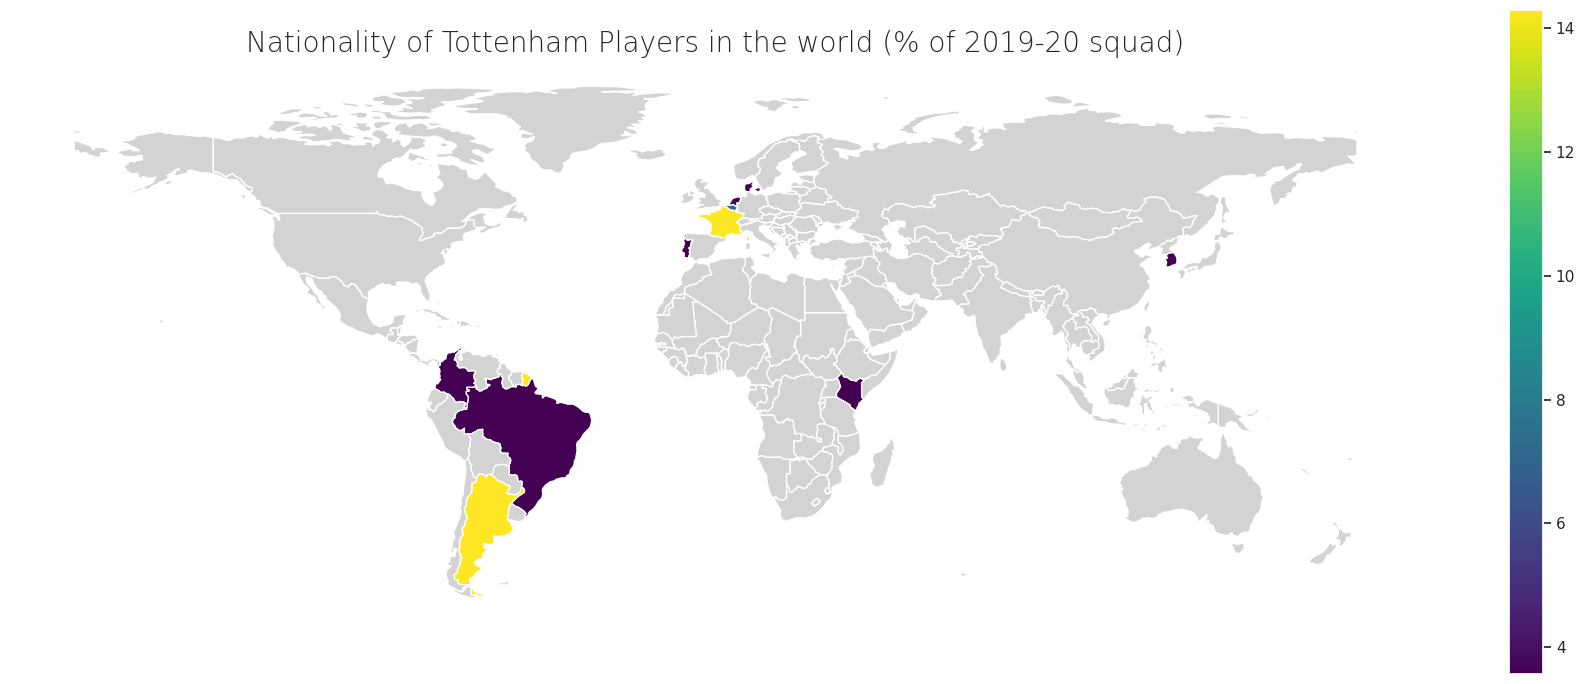

In [229]:
# Filter for Tottenham players only
tott_df = players_df[players_df['Team'] == 'Tottenham']

# Show the number of Tottenham players in the squad
print(f"Number of Tottenham Players:", tott_df['Player'].count())

# Count the number of nationalities
tott_df = tott_df.groupby('Nationality').size().to_frame('size').reset_index()

# Create a new column showing the player's country of origin by decoding the nationalities
tott_df['Nationality'].replace(
    {'ar': 'Argentina', 'be': 'Belgium', 'br': 'Brazil',
    'ci': 'Cote D’Ivoire', 'co': 'Colombia', 'dk': 'Denmark',
    'fr': 'France', 'gb-eng': 'England', 'gb-wls': 'Wales',
    'ke': 'Kenya', 'kr': 'South Korea', 'nl': 'Netherlands',
    'pt': 'Portugal'}, inplace = True
)
tott_df.rename({'Nationality': 'Country of Origin'}, axis=1, inplace=True)

# Show proportion of Tottenham players with different backgrounds
tott_df.rename({'size': 'Number of Players'}, axis=1, inplace=True)
tott_df['Percentage of Squad'] = (tott_df['Number of Players']/tott_df['Number of Players'].sum()).multiply(100)


# Load the world map data file
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
world = world[(world.name!="Antarctica")]

# Merge with country of origin data
world.rename({'name': 'Country of Origin'}, axis=1, inplace=True)
world = world.merge(tott_df, on=['Country of Origin'], how='left')

# Create the heatmap
fig, ax_world = plt.subplots(1, figsize=(18, 7))
ax_world.set_title(
    'Nationality of Tottenham Players in the world (% of 2019-20 squad)', 
    fontdict={'fontsize': '20', 'fontweight': '50'}
)
ax_world.axis('off')
world.plot(
    column='Percentage of Squad', 
    legend=True,
    ax=ax_world,
    edgecolor='white',
    linewidth=1,
    cmap='viridis',
    missing_kwds={"color": "lightgrey"}
)
fig.tight_layout()
tott_df

You may notice there are 29 Tottenham players listed in the squad which is more than the 25 stated in the criteria. This is because some players are loaned to different leagues and are not included in the count. For this question, they are included in the squad for greater representation.

**Answer to Question 1**

Of the 29 Tottenham players in the 2019-20 squad, there were 9 English-born players which was equivalent to 32.14% of the team. Almost one-third of the squad!

Looking at the geographical heatmap, we can see that a majority of the Tottenham squad is well represented by the South American and European continents.

**2. Which Tottenham player produced the most amount of goals in the form of goals scored and assisted in the 2019-20 season? Who else performed notably well?**

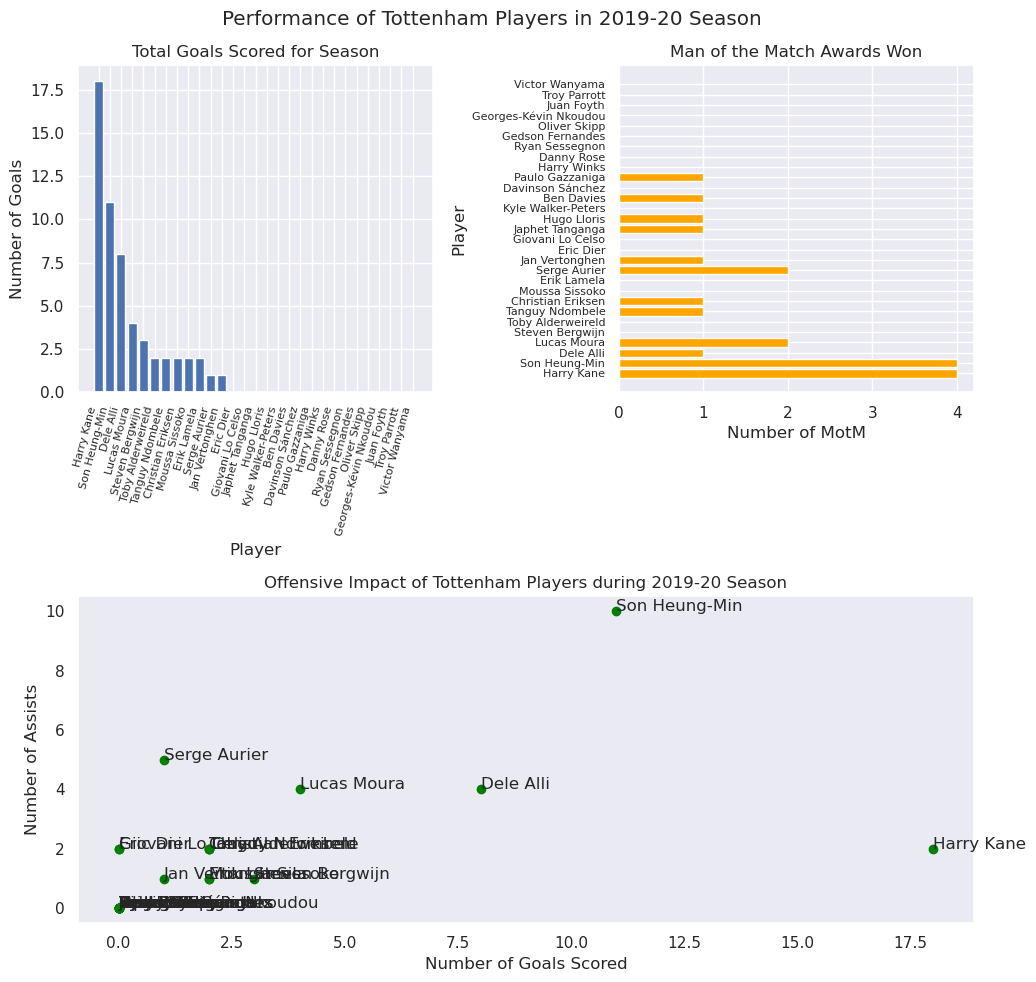

,Player,Total Goals Scored for Season,Total Assists for Season,Man of the Match Awards,Impact on number of team goals for season
id,,,,,
217,Harry Kane,18,2,4,20
570,Son Heung-Min,11,10,4,21
250,Dele Alli,8,4,1,12
245,Lucas Moura,4,4,2,8
641,Steven Bergwijn,3,1,0,4
882,Toby Alderweireld,2,2,0,4
819,Tanguy Ndombele,2,2,1,4
560,Christian Eriksen,2,2,1,4
540,Moussa Sissoko,2,1,0,3


In [230]:
# Filter for Tottenham players only
tott_df = players_df[players_df['Team'] == 'Tottenham']
tott_df = tott_df[['Player', 'Total Goals Scored for Season', 'Total Assists for Season', 'Man of the Match Awards']]
tott_df = tott_df.sort_values(
    by = ['Total Goals Scored for Season', 'Total Assists for Season'],
    ascending = [False, False]
)

# Create a new column to find the overall offensive impact a player had
tott_df['Impact on number of team goals for season'] = tott_df['Total Goals Scored for Season'] + tott_df['Total Assists for Season']

# Construct a figure containing visuals of player performance
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Performance of Tottenham Players in 2019-20 Season') 

# Plot a bar chart for total goals scored
ax = fig.add_subplot(2, 2, 1)
ax.bar(tott_df['Player'], tott_df['Total Goals Scored for Season'])
ax.set_title('Total Goals Scored for Season')
ax.set_xlabel('Player')
ax.set_ylabel('Number of Goals')
plt.setp(ax.get_xticklabels(), rotation=75, horizontalalignment='right', fontsize=8)

# Plot a horizontal bar chart of man of the match awards
ax = fig.add_subplot(2, 2, 2)
ax.barh(tott_df['Player'], tott_df['Man of the Match Awards'], color = 'orange')
ax.set_title('Man of the Match Awards Won')
ax.set_xlabel('Number of MotM')
ax.set_ylabel('Player')
plt.setp(ax.get_yticklabels(), fontsize=8)

# Plot a scatter plot
ax = fig.add_subplot(2, 1, 2)
ax.scatter(tott_df['Total Goals Scored for Season'], tott_df['Total Assists for Season'], color = 'green')
ax.set_title('Offensive Impact of Tottenham Players during 2019-20 Season')
ax.set_xlabel('Number of Goals Scored')
ax.set_ylabel('Number of Assists')
ax.grid()
fig.tight_layout()

# Annotate points in scatter plot
for idx, row in tott_df.iterrows():
    ax.annotate(row['Player'], (row['Total Goals Scored for Season'], row['Total Assists for Season']))

plt.show()


# Show data frame of Player Performance
tott_df

**Answer to Question 2**

No surprises here, the Spurs talismanic striker, Harry Kane, was the team's leading goal scorer during the 2019-20 season. Not far behind him was rising and now established superstar, Son Heung-Min with 11 goals scored. Son also had the most assists during the season with 10.

Analysing the overall impact on all team goals, Son Heung-Min was involved in more goals (21) than Harry Kane at 20. The visualizations above reinforce the notion that Son and Kane were Tottenham's most influential offensive players, with both of them tying for first place in the number of Man of the Match awards won throughout the season, at 4 each. The scatter plot also depicts other Tottenham players who performed notably well. This included Dele Alli, Lucas Moura, and Serge Aurier. In fact, the players who had the most impact on the number of team goals during the 2019-20 season received the majority of the team's Man of the Match awards.

**3. How does Tottenham perform when they're away as opposed to when they are playing from home? Is it a high percentage or not?**


In [231]:
# Assign points earned for every match to home or away team as well as the goal difference
teams_df['Winner'] = teams_df.apply(lambda row: 'H' if row['Home Team Goals'] > row['Away Team Goals'] else 'D' if row['Home Team Goals'] == row['Away Team Goals'] else 'A',axis = 1) 
teams_df['Home Points'] = teams_df['Winner'].apply(lambda x: 3 if x == 'H' else 1 if x == 'D' else 0) 
teams_df['Away Points'] = teams_df['Winner'].apply(lambda x: 0 if x == 'H' else 1 if x == 'D' else 3)
teams_df['Goal1 Difference'] = teams_df['Home Team Goals'] - teams_df['Away Team Goals']

opponents_df['Winner'] = opponents_df.apply(lambda row: 'H' if row['Home Team Goals'] > row['Away Team Goals'] else 'D' if row['Home Team Goals'] == row['Away Team Goals'] else 'A',axis = 1) 
opponents_df['Home Points'] = opponents_df['Winner'].apply(lambda x: 3 if x == 'H' else 1 if x == 'D' else 0) 
opponents_df['Away Points'] = opponents_df['Winner'].apply(lambda x: 0 if x == 'H' else 1 if x == 'D' else 3)
opponents_df['Goal2 Difference'] = opponents_df['Away Team Goals'] - opponents_df['Home Team Goals']

# Get unique team names and put them into an array
teams = teams_df
teams = teams['Team'].unique()

# Build the season statistics at the club level and merge with array of club names
seasonstats = pd.DataFrame(teams, columns = ['Team'])

# Find the statistics for each Premier League team
for stat in ['Home Points', 'Away Points', 'Goal1 Difference', 'Goal2 Difference']:
    if stat.split()[0]=='Home':
        stat = teams_df.groupby(by='Team')[stat].sum().reset_index()
    elif stat.split()[0]=='Away':
        stat = opponents_df.groupby(by='Team')[stat].sum().reset_index()
        #stat = stat.rename(columns = {'Opponent':'Team'})
    elif stat.split()[0]=='Goal1':
        stat = teams_df.groupby(by='Team')[stat].sum().reset_index()
    else:
        stat = opponents_df.groupby(by='Team')[stat].sum().reset_index()
    seasonstats = seasonstats.merge(stat, on = 'Team')


# Calculate total goal difference from both home and away games
seasonstats['Goal Difference'] = seasonstats['Goal1 Difference'] + seasonstats['Goal2 Difference']
seasonstats = seasonstats.drop(
    columns = ['Goal1 Difference', 'Goal2 Difference'],
    axis = 1
)

# Recreate the Premier League table, sorting by total number of points and goal difference
seasonstats['Total Points'] = seasonstats['Home Points'] + seasonstats['Away Points']
seasonstats = seasonstats.sort_values(by = ['Total Points', 'Goal Difference'], ascending = [False, False])
seasonstats['Position'] = seasonstats['Total Points'].rank(ascending = False, method='first').astype(int)
seasonstats = seasonstats.set_index('Position')

# Reveal the Premier League table
seasonstats

,Team,Home Points,Away Points,Goal Difference,Total Points
Position,,,,,
1,Liverpool,55,44,52,99
2,Man City,47,34,67,81
3,Man Utd,37,29,30,66
4,Chelsea,36,30,15,66
5,Leicester,37,25,26,62
6,Tottenham,39,20,14,59
7,Wolves,31,28,11,59
8,Arsenal,36,20,8,56
9,Sheffield United,33,21,0,54


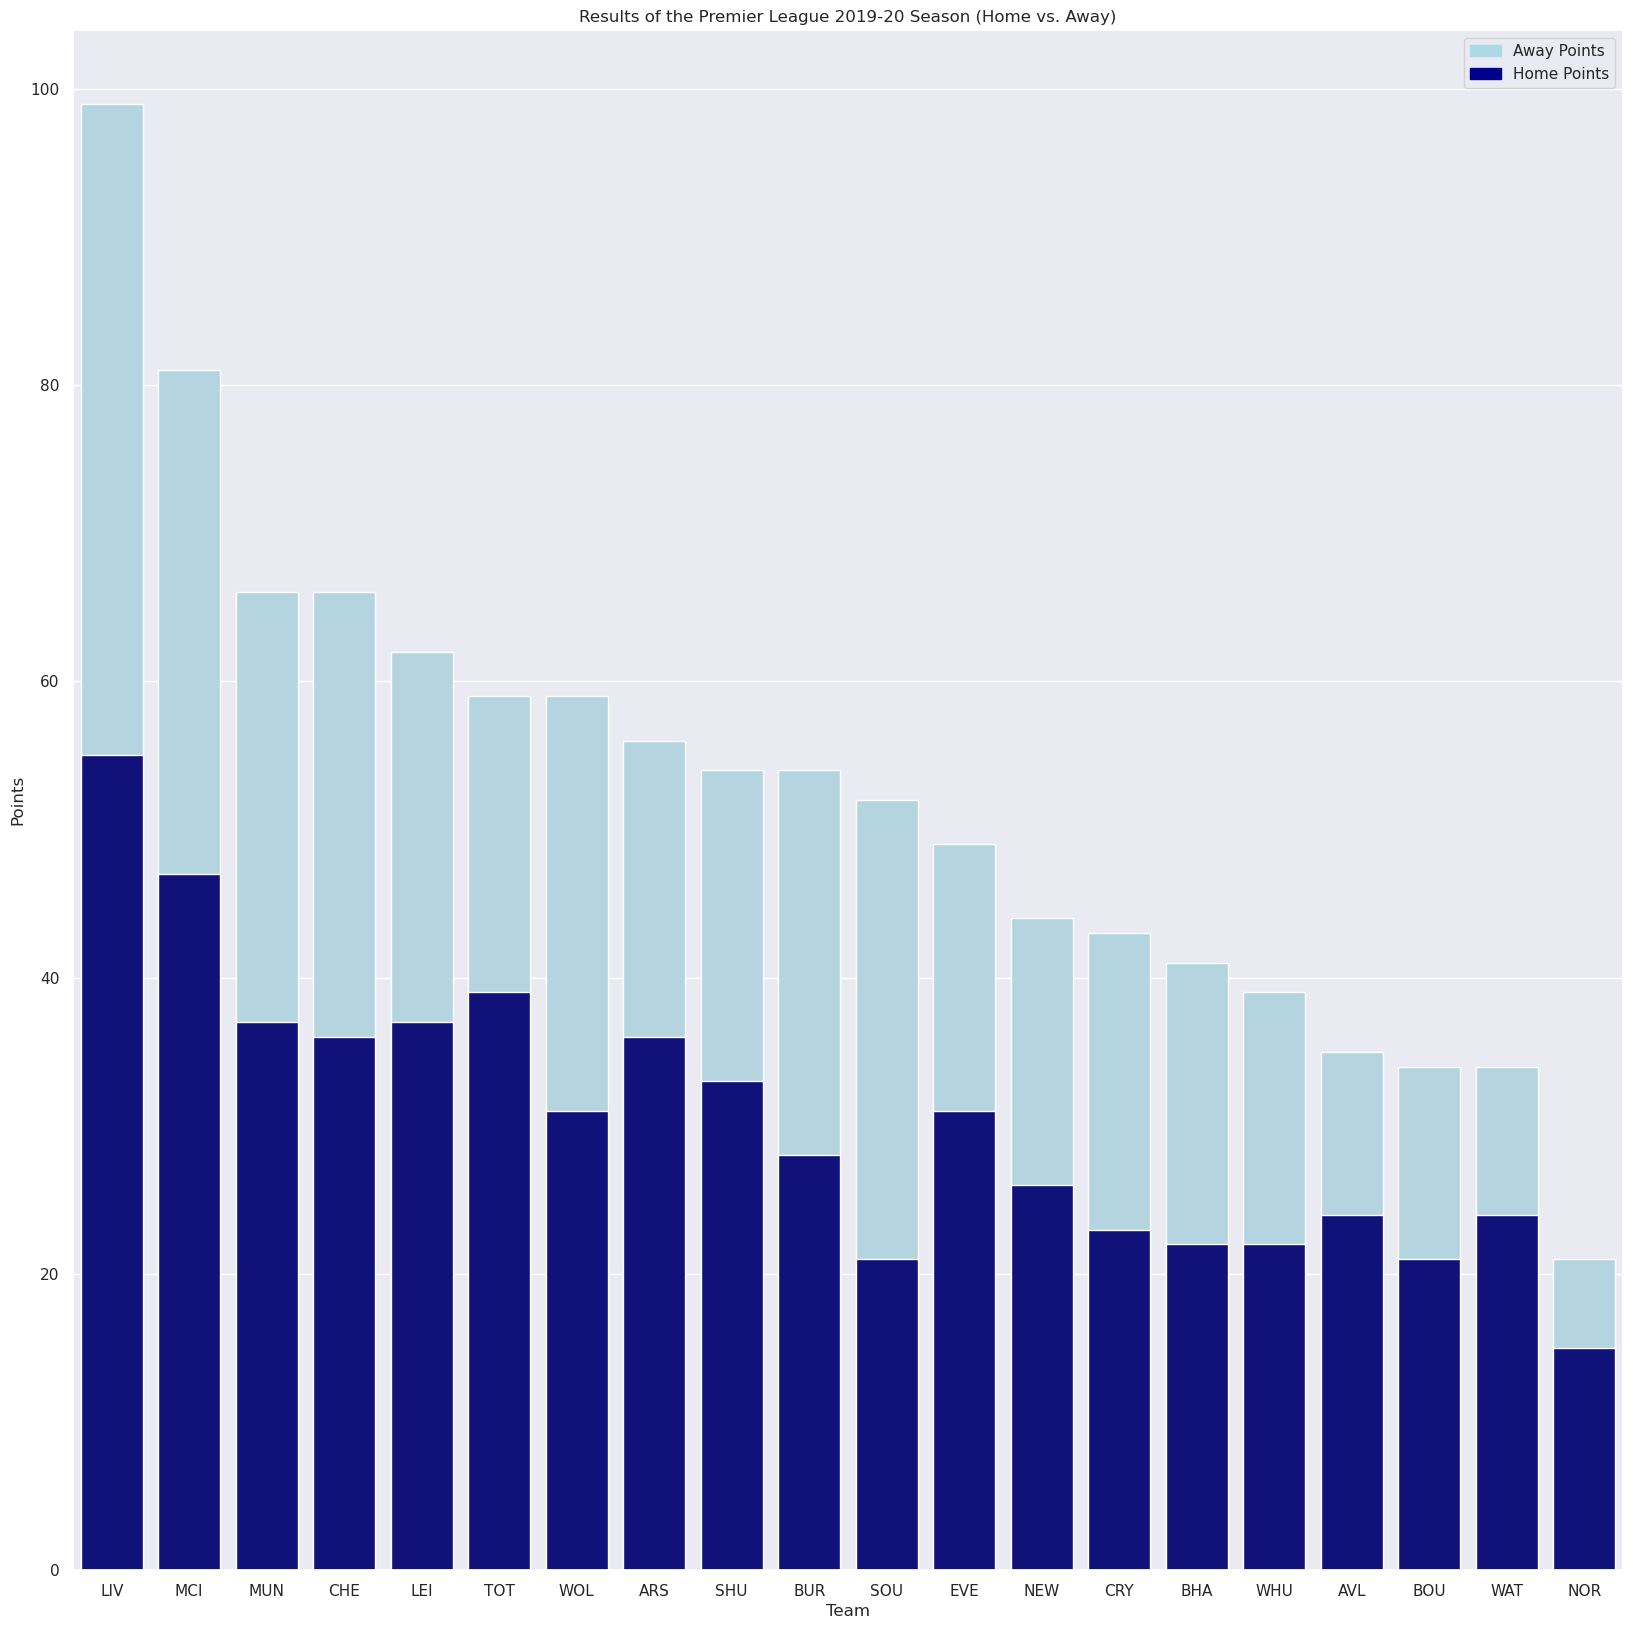

In [232]:
# Code the team names into easier to read acronyms
seasonstats['Team'].replace(
    {'Liverpool': 'LIV', 'Man City': 'MCI', 'Man Utd': 'MUN',
    'Chelsea': 'CHE', 'Leicester': 'LEI', 'Tottenham': 'TOT',
    'Wolves': 'WOL', 'Arsenal': 'ARS', 'Sheffield United': 'SHU',
    'Burnley': 'BUR', 'Southampton': 'SOU', 'Everton': 'EVE',
    'Newcastle United': 'NEW', 'Crystal Palace': 'CRY', 'Brighton': 'BHA', 
    'West Ham': 'WHU', 'Aston Villa': 'AVL', 'Bournemouth': 'BOU',
    'Watford': 'WAT', 'Norwich': 'NOR'}, inplace = True
)

# Create a stacked bar chart of home versus away points
sns.set(style='darkgrid')
plt.figure(figsize=(20,20))
awaybar = sns.barplot(x='Team', y='Total Points', data=seasonstats, color='lightblue')
homebar = sns.barplot(x='Team', y='Home Points', data=seasonstats, color='darkblue')
homebar.set(ylabel = 'Points')
top_bar = mpatches.Patch(color='lightblue', label='Away Points')
bottom_bar = mpatches.Patch(color='darkblue', label='Home Points')
plt.legend(handles=[top_bar, bottom_bar])
plt.title('Results of the Premier League 2019-20 Season (Home vs. Away)')
plt.show()

**Answer to Question 3**

A stacked bar chart was produced to allow for comparisons between teams. In addition, the table showcases the point earned playing home versus away for each team. 

From the bar chart, we can see that Tottenham performed better when they were playing from home, suggesting fan presence had some positive impact on performance. Away form seemed to be an issue for top clubs such as Arsenal and Tottenham, and is a big reason as to why they were not competing with the top 4. Of the 59 total points Tottenham earned, 39 were acquired playing at home as opposed to the 20 points earned when playing in enemy territory. That's two-third of their total points from the season!

Comparatively, this is a high percentage of points when looking at other teams who have a more even percentage distribution of home and away points. Tottenham also had the third most home points earned in the 2019-20 season. The data indicates that the club was a strong home team but underperformed when they were away.

**4. How does the scoring and creativity of Tottenham players compare to other top-tier players in the English Premier League?**

In the context of scoring and creativity, we will be using scoring and assist numbers like previous questions to determine offensive proficiency. To prevent bias against other players who have not played as many matches, every assessed player will have played at least 10 matches (equivalent to 900 minutes in game time).

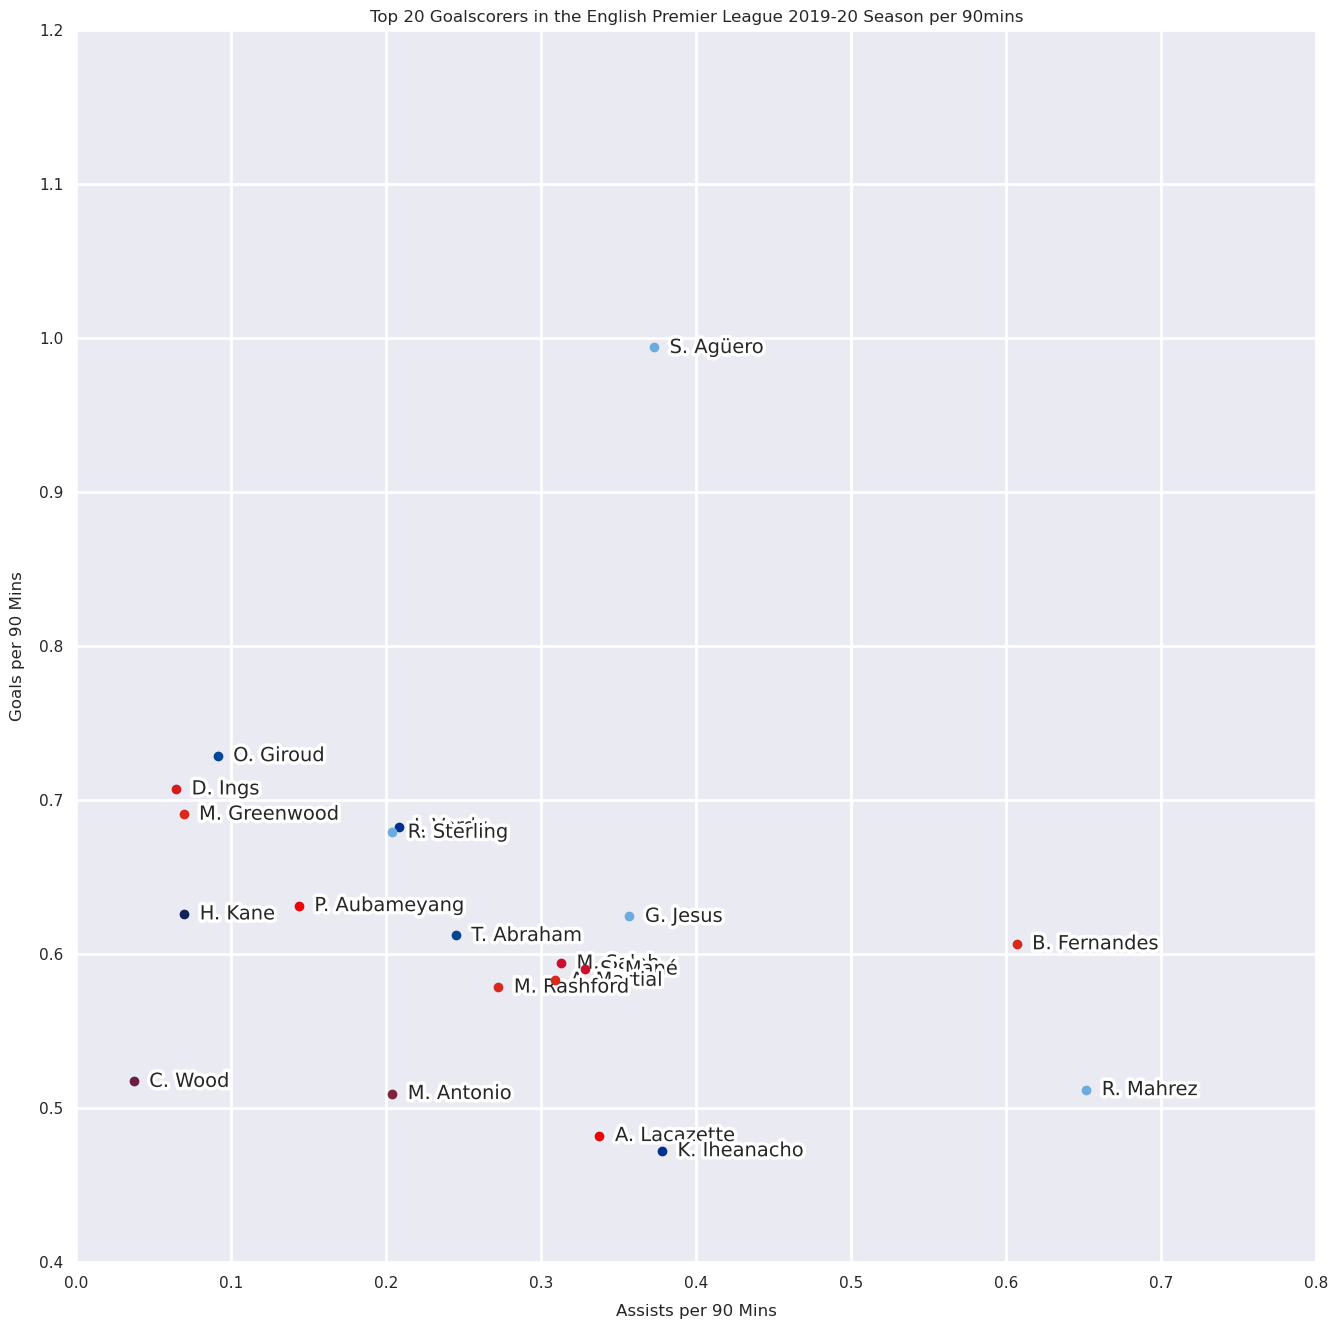

In [233]:
# Find top 50 goal scorers in EPL 2019-20
top50_gs = playersmatches_df.groupby(['Player', 'Team']).sum('Goals Scored by Player')
top50_gs = top50_gs.sort_values(
    by = 'Goals Scored by Player',
    ascending = False
)

# Obtain unique players from data frame
top50_gs.reset_index(level=(0, 1), inplace=True)
gs_players = top50_gs['Player']

# Create a dictionary to hold the top 20 players in goals scored and top 20 in assists
player_assists = {}
player_goals = {}
for player in gs_players:
    mins = top50_gs[top50_gs['Player'] == player]['Minutes Played'].sum()/90
    if mins >= 10: # At least 10 matches played
        player_goals[player] = top50_gs[top50_gs['Player'] == player]['Goals Scored by Player'].sum()/mins

# Find top 50 goal creators in EPL 2019-20
top50_as = playersmatches_df.groupby(['Player', 'Team']).sum('Assists')
top50_as = top50_as.sort_values(
    by = 'Assists',
    ascending = False
)

# Obtain unique players from data frame
top50_as.reset_index(level=(0, 1), inplace=True)
as_players = top50_as['Player']


for player in as_players:
    mins = top50_as[top50_as['Player'] == player]['Minutes Played'].sum()/90
    if mins >= 10: # At least 10 matches played
        player_assists[player] = top50_as[top50_as['Player'] == player]['Assists'].sum()/mins


# Sort according to top 20
top_players_goals = sorted(player_goals.keys(), key=player_goals.get, reverse=True)[:20]
top_players_assists = sorted(player_assists.keys(), key=player_assists.get, reverse=True)[:20]

# Update player names as there are syntax errors present
# Use first letter of first name and full last name as format
updated_names = {}
for player in gs_players:
    split_name = player.split(' ')
    updated_names[player] = split_name[0][0] + '. ' + split_name[-1]
for player in as_players:
    split_name = player.split(' ')
    updated_names[player] = split_name[0][0] + '. ' + split_name[-1]

# Update certain player names
updated_names['Sergio Ag?ero'] = 'S. Agüero'
updated_names['Sadio Man?'] = 'S. Mané'
updated_names['Ra?l Jim?nez'] = 'R. Jiménez'
updated_names['Nicolas P?p?'] = 'N. Pépé'
updated_names['Emiliano Buend?a'] = 'E. Buendía'
updated_names['Adama Traor?'] = 'A. Traoré'
updated_names['Pascal Gro?'] = 'P. Groß'
updated_names['Rui Pedro dos Santos Patr?cio'] = 'R. Patrício'

# Create a dictionary mapping team names to their Jersey colours
team_colors = {'Arsenal':'#ef0107', 'Aston Villa':'#95bfe5', 'Bournemouth':'#da291c', 'Brighton':'#0057b8',
               'Burnley':'#6c1d45', 'Chelsea':'#034694', 'Crystal Palace':'#1b458f', 'Everton':'#003399',
               'Leicester':'#003090', 'Liverpool':'#c8102e', 'Man City':'#6cabdd', 'Man Utd':'#da291c',
               'Newcastle United':'#241f20', 'Norwich':'#fff200', 'Sheffield United':'#ee2737', 
               'Southampton':'#d71920', 'Tottenham':'#132257', 'Watford':'#fbee23', 'West Ham':'#7a263a',
               'Wolves':'#fdb913'}

# Create Figure
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)

# Plot player data
# Place player's name next to data point by offsetting by 0.01
# Use path effects to put a thick white outline around each player name
for player in top_players_goals:
    team = top50_gs[top50_gs['Player'] == player]['Team'].iloc[0]
    ax.plot(player_assists[player], player_goals[player], 'o', color=team_colors[team], zorder=3)
    text = ax.text(player_assists[player] + 0.01, player_goals[player], updated_names[player], size=14, va='center', ha='left', zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])

# Add grid
ax.grid(color='white', linewidth=2)

# Axis labels
ax.set_xlabel('Assists per 90 Mins', labelpad=10)
ax.set_ylabel('Goals per 90 Mins', labelpad=10)

# Axis limits
ax.set_xlim(0, 0.8)
ax.set_ylim(0.4, 1.2)
plt.title('Top 20 Goalscorers in the English Premier League 2019-20 Season per 90mins')
plt.show()


From the graph, we can see that Sergio Agüero is a prolific goalscorer. His goal scoring rate was almost once every 90 minutes, around a goal every game! In terms of top goalscorers who also get others involved in the goal scoring process, Riyad Mahrez and Bruno Fernandes stand out from the rest of an already elite group.

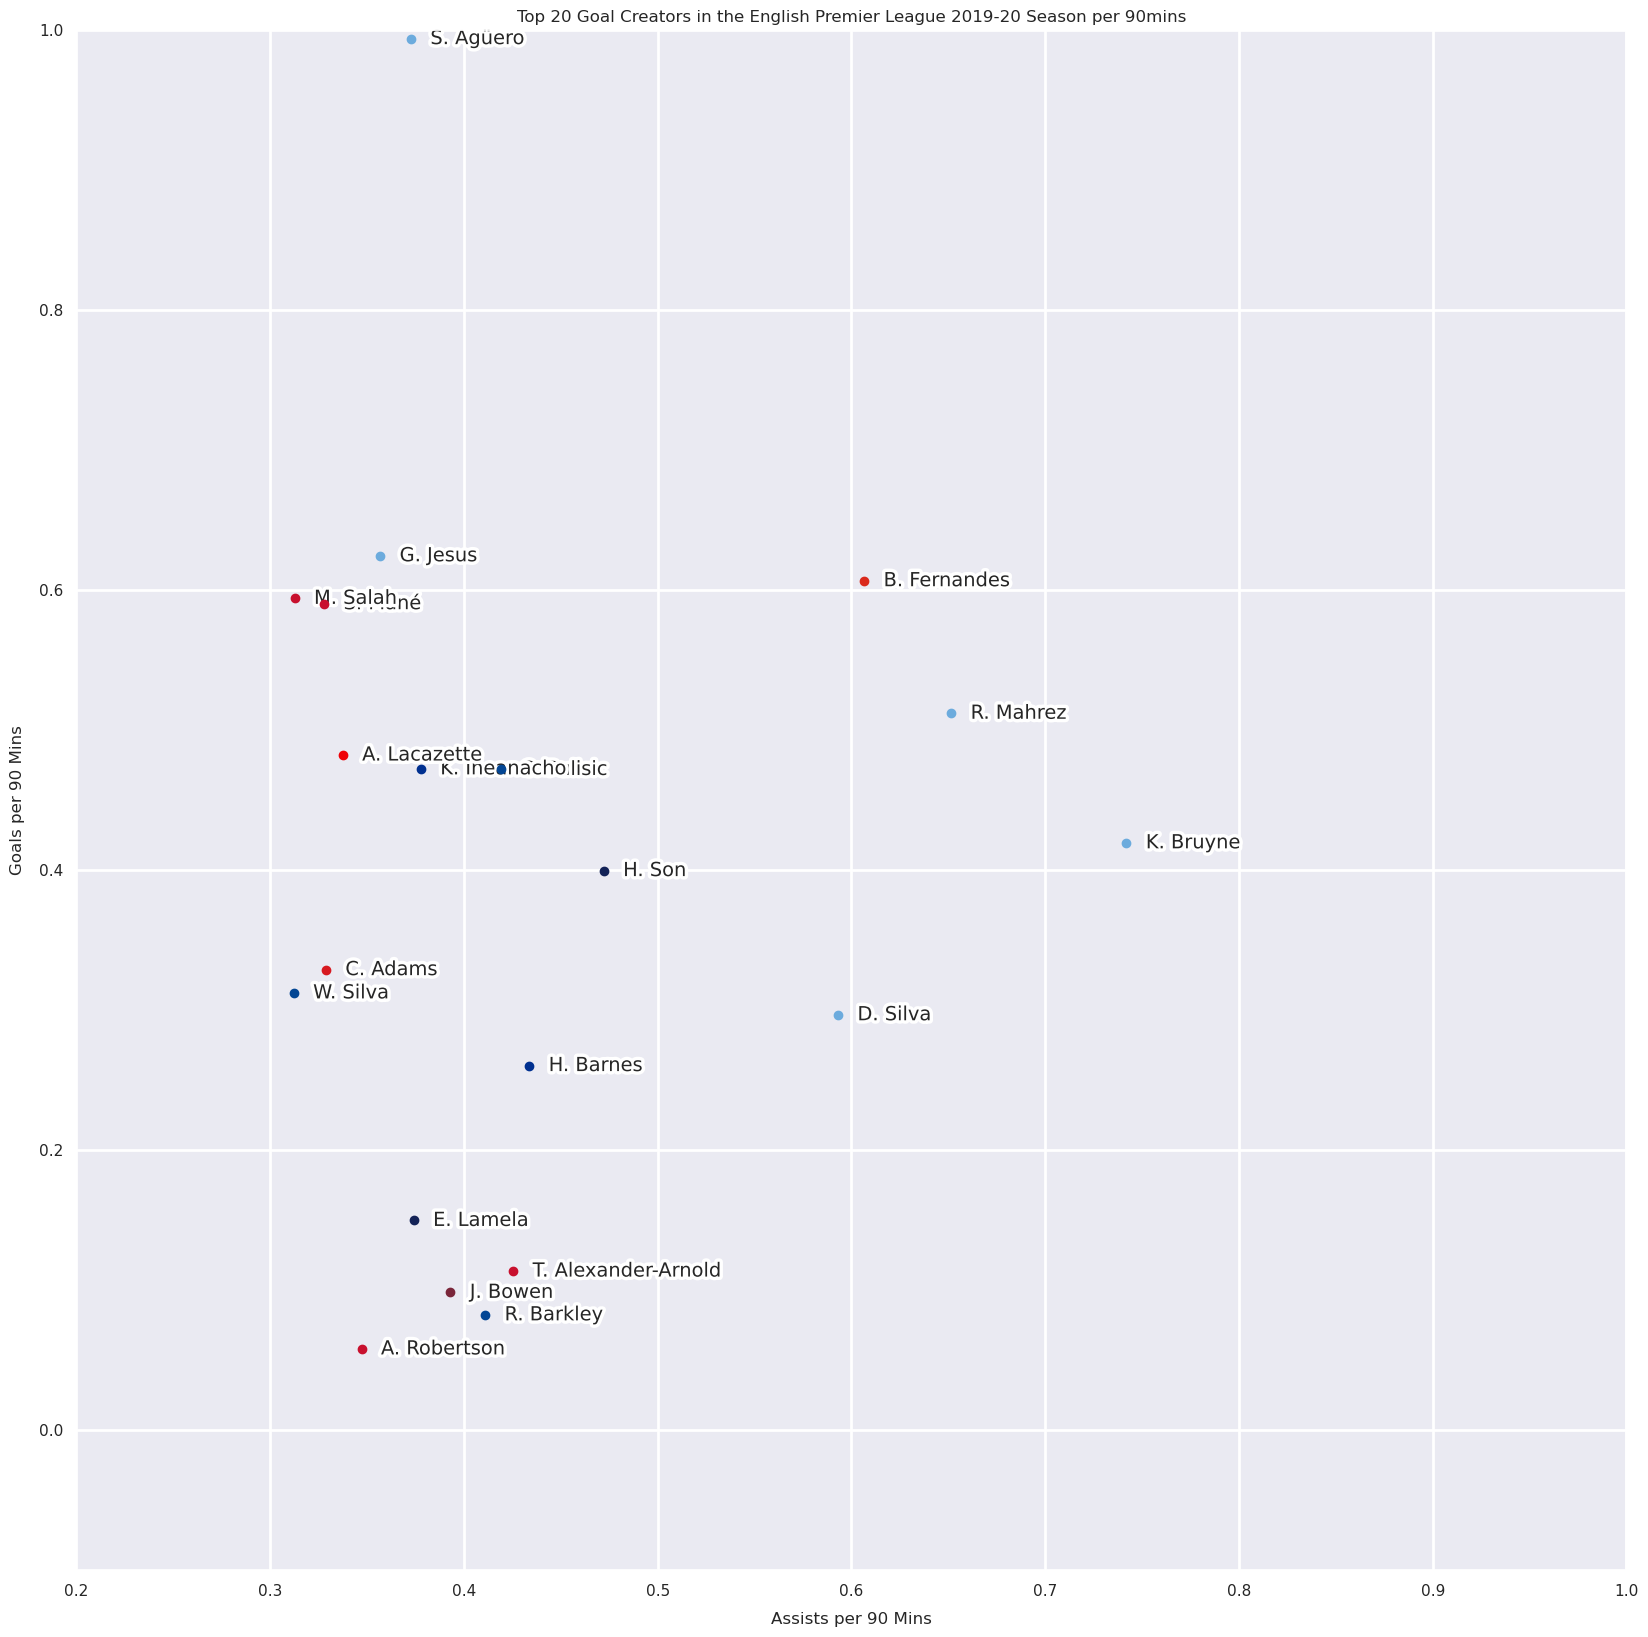

In [234]:
# Create Figure
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

# Plot player data
# Place player's name next to data point by offsetting by 0.01
# Use path effects to put a thick white outline around each player name
for player in top_players_assists:
    team = top50_as[top50_as['Player'] == player].Team.iloc[0]
    ax.plot(player_assists[player], player_goals[player], 'o', color=team_colors[team], zorder=3)
    text = ax.text(player_assists[player] + 0.01, player_goals[player], updated_names[player], size=14, va='center', ha='left', zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])

# Add grid
ax.grid(color='white', linewidth=2)

# Axis labels
ax.set_xlabel('Assists per 90 Mins', labelpad=10)
ax.set_ylabel('Goals per 90 Mins', labelpad=10)

# Axis limits
ax.set_xlim(0.2, 1)
ax.set_ylim(-0.1, 1)
plt.title('Top 20 Goal Creators in the English Premier League 2019-20 Season per 90mins')
plt.show()


Let's look at the players in the English Premier League who are best at keeping possession.

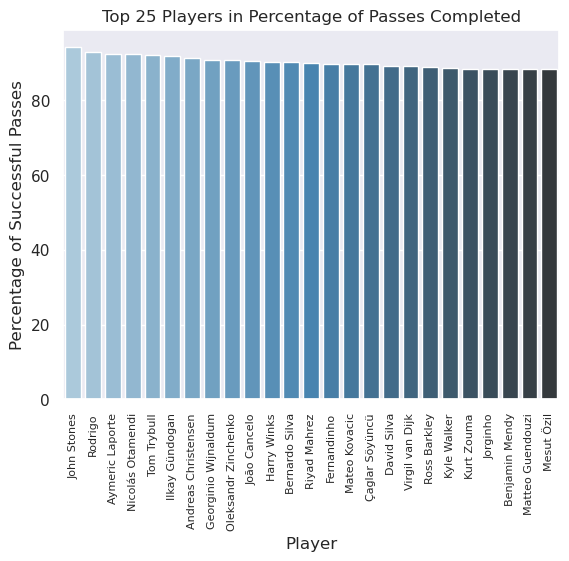

,Player,Percentage of Successful Passes
id,,
989,John Stones,94.2
181,Rodrigo,92.9
964,Aymeric Laporte,92.5
453,Nicolás Otamendi,92.4
667,Tom Trybull,92.0
550,Ilkay Gündogan,91.9
990,Andreas Christensen,91.4
566,Georginio Wijnaldum,90.8
561,Oleksandr Zinchenko,90.7


In [235]:
# Filter for players with at least 900 minutes played (equivalent to 10 matches)
players_df = players_df[players_df['Total Minutes Played for Season'] >= 900]

# Construct a bar blot pf top 25 accurate passers
ax = sns.barplot(data=players_df.nlargest(25, 'Percentage of Successful Passes')[['Player', 'Percentage of Successful Passes']],
                 x='Player', 
                 y='Percentage of Successful Passes', 
                 palette="Blues_d"
            )

# Formatting the bar plot                
plt.xticks(rotation=90, fontsize=8)
plt.title('Top 25 Players in Percentage of Passes Completed')
plt.show()

# Show table of top 25 players in pass percentage
players_df = players_df[['Player', 'Percentage of Successful Passes']]
players_df = players_df.sort_values(
     by = 'Percentage of Successful Passes',
     ascending = False
)
players_df.head(25)

Of the top 25 players with the highest percentage of successful passes from the 2019-20 season, only one Tottenham player was featured in Harry Winks. It took into account players with at least 900 minutes of game time. 

**Answer to Question 4**

Looking at the first scatter plot, Harry Kane was the only Tottenham player to feature in the prestigious top 20 goalscorers per 90 min club. Within this pool, Harry was in the top 10 for goals scored per 90 minutes, but his presence as a goal scoring threat did not translate to him providing scoring opportunities for his teammates. Moving onto next season, increasing his number of assists could be an improvement he could add to his game. Compared to his Manchester City and Chelsea counterparts, he would need to increase his number of goals or assists to eclipse them and move more towards the central area of the scatter plot.


For the second scatter plot, Son Heung-min has performed excellently as a goal creator, lying within the top 5 for number of assists per 90 minutes. He roughly produces 0.47 assists per 90 minutes and scores 0.4 goals per 90 minutes. Not too shabby. However, looking at the far right side, three of the four top assisters per 90 minutes all came from Manchester City - Riyad Mahrez, Kevin de Bruyne, and David Silva. Not to mention, two of their strikers were also providing assists in Gabriel Jesus and Agüero. There was also solid representation from Livepool in the top 20, with four of their players featuring in the scatter plot.Of course Mohamed Salah and Sadio Mané were to be expected but their wingbacks Andrew Robertson and Trent Alexander-Arnold provided offensive power despite playing in a defensive position.

In the third bar plot which revealed the top 25 accurate passers in the league, only Harry Winks made it through with a successful pass completion rate of 90.3%. Conversely, 12 Manchester City players represented the top 25 with 3 of their back four holding the highest passing percentages in the league. Tottenham's lack of presence in this category showcases an inability to retain possession.

It looks like Harry Kane and Sonny will need more attacking support heading into next season!

**5. How does Tottenham's goalkeeping performance compare to other teams in the English Premier League for the 2019-20 season?**



In [236]:
# Find top 50 goalkeepersin EPL 2019-20
top50_gk = playersmatches_df.groupby(['Player', 'Team']).sum('Saves')
top50_gk = top50_gk.sort_values(
    by = 'Saves',
    ascending = False
)

# Obtain unique players from data frame
top50_gk.reset_index(level=(0, 1), inplace=True)
gk_players = top50_gk['Player']

# Create a dictionary to hold goalkeeper saves and clean sheets data
gk_saves = {}
gk_cleansheets = {}
for player in gk_players:
    mins = top50_gk[top50_gk['Player'] == player]['Minutes Played'].sum()/90.
    if mins >= 10:
        gk_saves[player] = top50_gk[top50_gk['Player'] == player]['Saves'].sum()/mins
        gk_cleansheets[player] = top50_gk[top50_gk['Player'] == player]['Clean Sheets'].sum()

# Sort according to number of saves per 90 minutes
top_gks_saves = sorted(gk_saves.keys(), key=gk_saves.get, reverse=True)[:22]

# Update formatting of player names to last name and first initial of first name
for player in gk_players:
    split_name = player.split(' ')
    updated_names[player] = split_name[0][0] + '. ' + split_name[-1]
updated_names['Rui Pedro dos Santos Patr?cio'] = 'R. Patrício'

# Show list of goalkeepers
top_gks_saves

['Hugo Lloris',
 'Bernd Leno',
 'Martin Dubravka',
 'Tim Krul',
 'Aaron Ramsdale',
 'Tom Heaton',
 'Paulo Gazzaniga',
 'Vicente Guaita',
 'Nick Pope',
 'Ben Foster',
 'Mathew Ryan',
 'Lukasz Fabianski',
 'Angus Gunn',
 'Alex McCarthy',
 'Jos? Reina',
 'Dean Henderson',
 'Kasper Schmeichel',
 'David de Gea',
 'Jordan Pickford',
 'Rui Pedro dos Santos Patr?cio',
 'Alisson Ramses Becker',
 'Ederson Santana de Moraes']

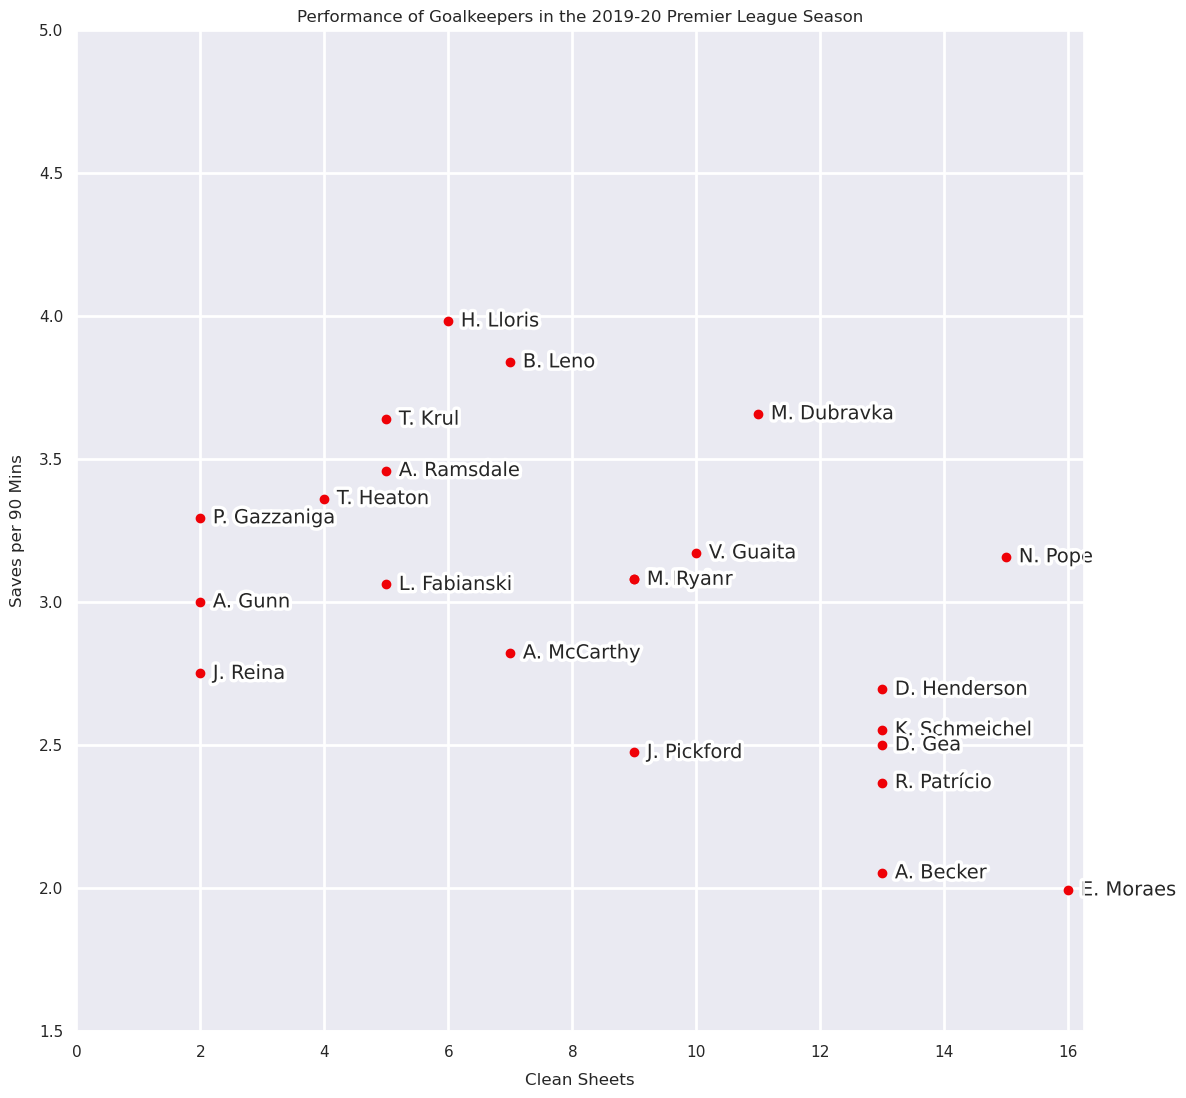

In [237]:
# Create a dictionary mapping team names to their Jersey colours
team_colors = {'Arsenal':'#ef0107', 'Aston Villa':'#95bfe5', 'Bournemouth':'#da291c', 'Brighton':'#0057b8',
               'Burnley':'#6c1d45', 'Chelsea':'#034694', 'Crystal Palace':'#1b458f', 'Everton':'#003399',
               'Leicester':'#003090', 'Liverpool':'#c8102e', 'Man City':'#6cabdd', 'Man Utd':'#da291c',
               'Newcastle United':'#241f20', 'Norwich':'#fff200', 'Sheffield United':'#ee2737', 
               'Southampton':'#d71920', 'Tottenham':'#132257', 'Watford':'#fbee23', 'West Ham':'#7a263a',
               'Wolves':'#fdb913'} # Not working check code

# Create figure
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)

# Plot GK data
for gk in top_gks_saves:
    team = top50_gk[top50_gk['Player'] == player]['Team'].iloc[0]
    ax.plot(gk_cleansheets[gk], gk_saves[gk], 'o', color=team_colors[team], zorder=3)
    text = ax.text(gk_cleansheets[gk] + 0.2, gk_saves[gk], updated_names[gk], size=14, va='center', ha='left', zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])

# Add grid
ax.grid(color='white', linewidth=2)

# Axis label
ax.set_xlabel('Clean Sheets', labelpad=10)
ax.set_ylabel('Saves per 90 Mins', labelpad=10)

# Axis limits
ax.set_xlim(0, 16.25)
ax.set_ylim(1.5, 5)
plt.title('Performance of Goalkeepers in the 2019-20 Premier League Season')
plt.show()

**Answer to Question 5**

Hugo Lloris is the Spur's goalkeeper and analysing the scatter plot, Tottenham have the best goalkeeper in the Premier League in terms of the highest number of saves per match. This may also be a reflection of Tottenham's weak defense. In a well-balanced team with a strong back four, goalkeepers do not have to parry a lot of shots on goal and therefore will be able to keep a lot of clean sheets. Hence, they will be near the bottom right quadrant with a higher number of clean sheets and less saves required. 

Comparing Lloris's performance with the Manchester City goalkeeper, Ederson Moraes, the previous statement rings true. Ederson had the highest number of clean sheets at 16, which was 10 higher than Tottenham's Mr. Reliable. These facts are also consistent with previous data that was found with Manchester City having the largest goal difference, indicating that they have a strong defence that gives them a freedom to unleash their relentless attack. Since their offensive frontline are also very capable, they have greater possession which leaves them less vulnerable to opposition attacking threats.


**6. Which season saw the most comebacks from Tottenham?** 

This last question is posed as more of a fun one and allows us to revisit Tottenham's most memorable moments throughout Premier League history. The intention is to help fans statistically classify and find, Tottenham's most entertaining season.

,Season,Match Date and Time,Home Team,Away Team,Full Time Home Team Goals,Full Time Away Team Goals,Full Time Result,Half Time Home Team Goals,Half Time Away Team Goals,Half Time Result,Comeback
2832,2000-01,2000-08-19T00:00:00Z,Tottenham,Ipswich,3,1,H,2,1,H,0
2856,2000-01,2000-09-05T00:00:00Z,Tottenham,Everton,3,2,H,1,2,A,1
2872,2000-01,2000-09-11T00:00:00Z,Tottenham,West Ham,1,0,H,0,0,D,0
2919,2000-01,2000-10-21T00:00:00Z,Tottenham,Derby,3,1,H,2,1,H,0
2940,2000-01,2000-11-04T00:00:00Z,Tottenham,Sunderland,2,1,H,1,0,H,0
...,...,...,...,...,...,...,...,...,...,...,...
10498,2020-21,2020-11-08T12:00:00Z,West Brom,Tottenham,0,1,A,0,0,D,0
10599,2020-21,2021-01-17T14:00:00Z,Sheffield United,Tottenham,1,3,A,0,2,A,0
10686,2020-21,2021-03-04T18:00:00Z,Fulham,Tottenham,0,1,A,0,1,A,0
10713,2020-21,2021-03-21T19:30:00Z,Aston Villa,Tottenham,0,2,A,0,1,A,0


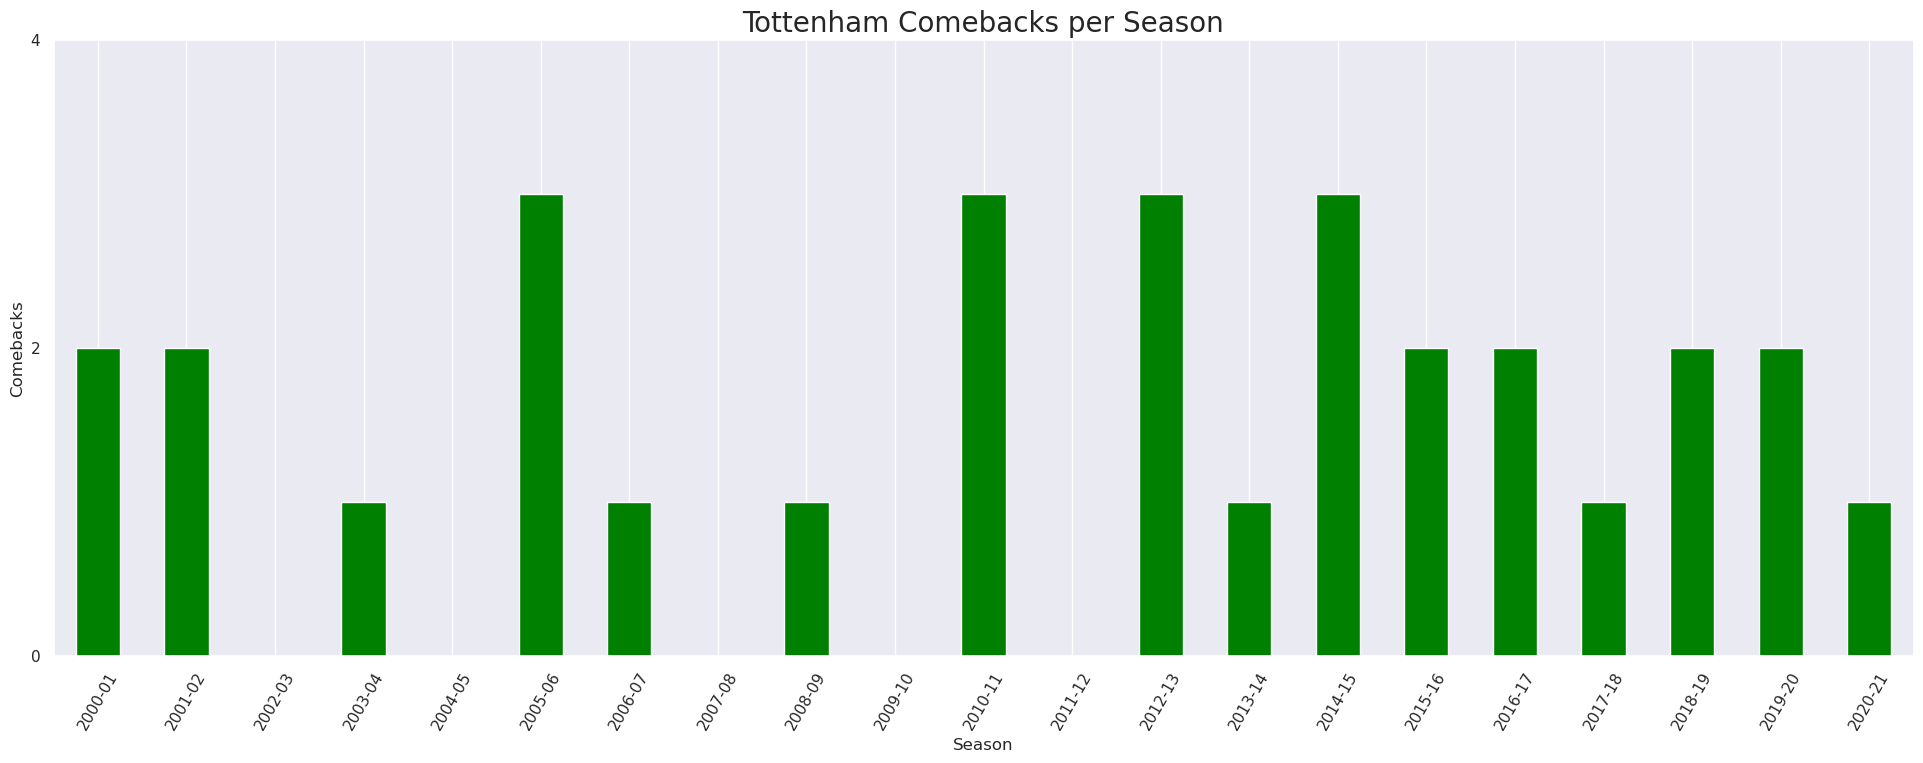

In [238]:
# Remove rows with missing half time data from data frame
seasons_df = seasons_df.drop(seasons_df.index[0:2824])

# Create new data frame where Tottenham won as home team
tott_home = seasons_df[seasons_df['Home Team'] == 'Tottenham']
tott_home = tott_home[tott_home['Full Time Result'] == 'H']


# Create new data frame where Tottenham won as away team
tott_away = seasons_df[seasons_df['Away Team'] == 'Tottenham']
tott_away = tott_away[tott_away['Full Time Result'] == 'A']


# Merge the two dataframes to use for comeback column creation
seasons_df = pd.concat([tott_home, tott_away])


# Define a 'Comeback' column which is when a team losing at halftime goes on to win the match at full time
seasons_df['Comeback']=np.where(
    (seasons_df['Full Time Result'] != seasons_df['Half Time Result']) & (seasons_df['Full Time Result']!='D') 
    & (seasons_df['Half Time Result']!='D'),1,0
    )

# Create a bar chart depicting comeback data visually
seasons_df.groupby('Season')['Comeback'].sum().plot(
    kind='bar',
    figsize=(24,8),
    color='green',
    yticks=np.arange(0,6,2)
    )
plt.grid(axis='y')
plt.title("Tottenham Comebacks per Season",fontsize=20)
plt.ylabel('Comebacks')
plt.xticks(rotation=60)

# Print out match data of all Tottenham wins including comebacks and non-comebacks
seasons_df

**Answer to Question 6**

As can be seen in the bar chart, Tottenham comebacks happen very rarely. So they become even more memorable when they do occur! The most comebacks Tottenham has had in a season are 3. There are four times this happened, leaving Tottenham fans with a choice between the 2005-06, 2010-11, 2012-13, and 2014-15 season to view these iconic moments. Starting from 2012-13, Tottenham has had at least 1 comeback per season, suggesting that they have built a culture of resilience as of late. 


### **5. Conclusions and Discussions**
Overall, the results of this analysis highlight the key reasons behind Tottenham's 2019-20 season performance. Tottenham is through and through an English club and analysing the squad like we did in Q1, most of its players came from a European and South American background. Of these nationailities, the highest proportion were of English background at 32.14%. It was interesting to see that Oceanic and North American representation was non-existent.

In terms of the on-field performance of the squad, it was clear that Harry Kane and Son Heung-min were the key figures driving Tottenham's campaign. Harry Kane was the top goalscorer in the team and Son Heung-min had the highest number of assists. Their positive impact was reflected in the number of Man of the Match awards they won, with 8 combined as shown in question 2. Whilst it is expected that wingers and strikers hold the lion's share of the goal distribution, the Spurs counterattacking style of football meant that other players had less impact on the offensive end since they were more focused on defensive duties.

Continuing the theme of on-field performance, question 3 focused on Tottenham's ability to acquire points both at home and at away grounds. One of the reasons Tottenham was unable to surpass the top four teams was because they could not find a way to win at opponent's stadiums. They lost a majority of their away points despite having the third most home points at 39. 

Individual assessment of the players in questions 4 and 5 meant comparing the performance of Tottenham's top players against the very best the competition had to offer. Naturally, this included football superstars within Manchester City, Chelsea, Liverpool and Manchester United. In the case of Kane, he had healthy goal scoring habit of 0.62 goals per 90 min but a room for improvement that was identified was in providing assists for his teammates. Unfortunately, Harry was the only Spur in the top 20 goalscoreres per 90 min whilst Manchester City had 5 alone.

For goal creation, Son was the mastermind behind Tottenham's attacking prowess, lying within the top 5 for number of assists per 90 minutes. He roughly produced 0.47 assists per 90 minutes and scored 0.4 goals per 90 minutes. In relation to other teams, it was identified Son would need more support for assists heading forward as Manchester City had 3 of the top 4 goal creators within their team. The disparity between these players and Son in terms of assist creation was quite large too at 0.2 assists per 90 minutes.

From a defensive perspective, Hugo Lloris had the most saves per 90 minutes out of all goalkeepers in the league. A reflection of Tottenham's weak defense. It was determined that a well-balanced team with a strong back four would not put the goalkeeper in a position to make constant saves and therefore they would be able to keep a lot of clean sheets. Hugo Lloris only had 6 clean sheets despite being first in saves, 10 clean sheets less than Manchester City's goalkeeper.

The final question looked at which seasons Tottenham showed the most desire to win and produce the number of most comebacks. Expectations around the club have increased given previous successful international performances such as reaching a Champions League Final in 2019. Hence, it is important the club builds a culture of resilience and determination which is reflected in the increase in the number of comebacks per season in recent years. It was found the most comebacks Tottenham had in a season was 3 and this occurred 4 times.

Given the managerial style of the new coach, Jose Mourinho, who is known as a defensive guru and a person who steels the mentality of his players, it will be interesting to see if Tottenham's defensive capabilities improve over the next few seasons. Studies show that football is beneficial for working memory following exercise, in high-fit participants only (Williams et al., 2020). If the Tottenham players can leverage their football IQ and make the necessary changes as identified in this project, it will be no time before they win an English Premier League trophy of their own.


### **6. Future Analysis**

The factors influencing the outcome of a football match are a lot more complex than the number of goals scored or assisted. The game is extremely dynamic, and to capture the small subtleties of it, advanced metrics will need to be used as well as statistical probability techniques. Some areas of interest for future study include:


* Identifying the effectiveness of different footballing styles/tactics employed by different teams.
* Incorporating the other advanced metrics (FBREF, 2021) included within the dataset such as the aerial passes completed, number of interceptions per match, tackles made per match etc. to measure the performance of individual players across the league.
* The balance between physicality and discipline within a game and analysing how it affects winning outcomes through the number of yellow and red cards.
* Determining Son Heung-min's impact with and without Harry Kane.

Some limitations to the analysis included:

* Difficulty in matching different data files using team as an index with match level data because there are two teams present, a home team and an away team. They needed to be explicitly defined and in some cases imported twice to obtain the full data and complete the merge.
* Inconsistent spelling with club names, the use of colloquial football terminology, different characters used in footballer's names all made it difficult to clean and prevent missing data from joins.
* Unfamiliarity and inexperience with Python - I was unable to manipulate the data to the extent I wished to due to a lack of expertise with the language. In future, I hope to become proficient enough to tackle more football datasets with Python.


### **7. References**

Alex (2020). EPL Players deep stats 2019/2020 [online] kaggle.com. Available at: https://www.kaggle.com/cashncarry/epl-players-deep-stats-20192020 [Accessed 12 Aug. 2020].

Alvin (2021). English Premier League Results [online] kaggle.com. Available at: https://www.kaggle.com/irkaal/english-premier-league-results [Accessed 12 Aug. 2020].

Challies, J. (2019). Here's when 2019/20 Premier League fixtures will be revealed [online] LeicestershireLive. Available at: https://www.leicestermercury.co.uk/sport/football/football-news/heres-201920-premier-league-fixtures-2772507 [Accessed 13 Aug 2021].

FBREF (2021). xG Explained. [online] FBREF. Available at: https://fbref.com/en/expected-goals-model-explained/ [Accessed 16 Aug. 2021].

Friend, K. (2019). Brighton and Hove Albion vs. Norwich City. [online] Premier League. Available at: https://www.premierleague.com/match/46708 [Accessed 16 Aug. 2021].

GeoPandas developers (2019). Plotting with Geoplot and GeoPandas — GeoPandas 0.8.0 documentation. [online] geopandas.org. Available at: https://geopandas.org/gallery/plotting_with_geoplot.html [Accessed 10 Aug. 2021].

GeoPandas developers (2019). Mapping and Plotting Tools. [online] geopandas.org. Available at: https://geopandas.org/docs/user_guide/mapping.html[Accessed 10 Aug. 2021].

Geoplot developers (2021). Customizing Plots. [online] geoplot.org. Available at: https://residentmario.github.io/geoplot/user_guide/Customizing_Plots.html#customizing-plots [Accessed 10 Aug. 2021].

Pandas developers (2021). Merge, join, concatenate and compare. [online] pandas.org. Available at: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-on-a-combination-of-columns-and-index-levels [Accessed 12 Aug 2021].

Pawar, A. (2020). EPL 2019 - 2020 analysis using OPTA stats [online] kaggle.com. Available at: https://www.kaggle.com/scientistdat/epl-2019-20-opta-analysis/data?select=match_infos_EPL_1920.csv#data [Accessed 10 Aug. 2021].

Premier League (2021). Updated squad lists for 2020/21 Premier League [online] Premier League. Available at: https://www.premierleague.com/news/2015249 [Accessed 14 Aug. 2021].

Smale, S. (2021). Who will win and who will be relegated in Premier League season 2021-22? [online] ABC. Available at: https://www.abc.net.au/news/2021-08-13/premier-league-season-2021-22-preview/100364606 [Accessed 15 Aug. 2021].

Williams, R., Cooper, S., Dring, K., Hatch, L., Morris, J., Sunderland, C. and Nevill, M.E. (2020).*Effect of football activity and physical fitness on information processing, inhibitory control and working memory in adolescents* BMC Public Health, 20(1), p.1398.

Yoely, I. (2020). English Premier League stats 2019-2020 [online] kaggle.com. Available at: https://www.kaggle.com/idoyo92/epl-stats-20192020 [Accessed 11 Aug. 2021].


